
#Start by connecting gdrive into the google colab



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import packages

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

# Reading Data

In [2]:
df = pd.read_csv('/content/gdrive/My Drive/iowa_liquor_sales_dataset.csv')
df.sample(10)

,Unnamed: 0,date,store_number,store_name,city,zip_code,county_number,county,category,category_name,...,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
299580,299580,2018-03-23,2178,DOUBLE D LIQUOR STORE,WAUKON,52172.0,3.0,ALLAMAKEE,1062400.0,SPICED RUM,...,43337,CAPTAIN MORGAN SPICED RUM,12,11.75,1000,17.63,36,634.68,36.00,9.51
3060320,3060320,2020-11-20,4266,WAL-MART 1683 / SHENANDOAH,SHENANDOAH,51601.0,73.0,PAGE,1700000.0,TEMPORARY & SPECIALTY PACKAGES,...,101104,BULLIET BOURBON WITH 2 CERAMIC MUGS,6,16.50,750,24.75,6,148.50,4.50,1.18
9073426,9073426,2022-04-15,5971,PONY CREEK LIQUOR / GLENWOOD,GLENWOOD,51534.0,65.0,MILLS,1012400.0,IRISH WHISKIES,...,915534,HA BLUE SPOT CASK,6,49.97,750,74.96,1,74.96,0.75,0.19
3245182,3245182,2022-02-10,5142,SMOKIN' JOE'S #13 TOBACCO AND LIQUOR OUTLET,CEDAR RAPIDS,52303.0,57.0,LINN,1031100.0,AMERICAN VODKAS,...,38174,TITOS HANDMADE VODKA,12,5.42,375,8.13,12,97.56,4.50,1.18
10905185,10905185,2020-04-28,5133,DON'S FOOD CENTER,ORANGE CITY,51041.0,84.0,SIOUX,1062500.0,FLAVORED RUM,...,42716,MALIBU COCONUT RUM,12,7.49,750,11.24,12,134.88,9.00,2.37
9832183,9832183,2018-05-21,2538,HY-VEE FOOD STORE #3 / WATERLOO,WATERLOO,50702.0,7.0,BLACK HAWK,1081300.0,AMERICAN CORDIALS & LIQUEUR,...,77730,TRAVIS HASSE'S COW PIE,6,7.94,750,11.91,2,23.82,1.50,0.40
2214263,2214263,2021-06-14,4126,SAM'S MAINSTREET MARKET / SOLON,SOLON,52333.0,52.0,JOHNSON,1062400.0,SPICED RUM,...,43073,ADMIRAL NELSON SPICED 101,12,7.50,750,11.25,4,45.00,3.00,0.79
10426372,10426372,2019-04-13,2569,HY-VEE FOOD STORE #2 / CEDAR RAPIDS,CEDAR RAPIDS,52402.0,57.0,LINN,1081200.0,CREAM LIQUEURS,...,73055,RUMCHATA,12,12.50,750,18.75,2,37.50,1.50,0.39
7644145,7644145,2021-01-04,2614,HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT,DAVENPORT,52807.0,82.0,SCOTT,1042100.0,IMPORTED DRY GINS,...,28867,TANQUERAY GIN,12,15.50,1000,23.25,12,279.00,12.00,3.17
306807,306807,2020-11-03,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,SIOUX CITY,51105.0,97.0,WOODBURY,1031200.0,AMERICAN FLAVORED VODKA,...,39680,DEEP EDDY RUBY RED GRAPEFRUIT MINI,12,4.21,50,6.32,5,31.60,0.25,0.06


# Data Cleaning

Since we don't need the index column, we will remove our **unnamed: 0** column that is working as an index here.

In [3]:
df.drop(columns='Unnamed: 0',inplace=True)

Let's see the shape of our dataset

In [4]:
df.shape

(12061225, 21)

We can see that there are more than **12 Million rows** and **21 columns**.

Now, let's see which all columns are there in our dataset

In [5]:
df.columns

Index(['date', 'store_number', 'store_name', 'city', 'zip_code',
       'county_number', 'county', 'category', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'pack',
       'state_bottle_cost', 'bottle_volume_ml', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

Let's see the datatypes of the above columns

In [6]:
df.dtypes

date                    object
store_number             int64
store_name              object
city                    object
zip_code               float64
county_number          float64
county                  object
category               float64
category_name           object
vendor_number          float64
vendor_name             object
item_number              int64
item_description        object
pack                     int64
state_bottle_cost      float64
bottle_volume_ml         int64
state_bottle_retail    float64
bottles_sold             int64
sale_dollars           float64
volume_sold_liters     float64
volume_sold_gallons    float64
dtype: object

Let's print a list of all the numerical and categorical variable separately that exist in our dataset.

In [7]:
quantitative = list(df._get_numeric_data().columns)
categorical = list(df.select_dtypes('object').columns)
print('Quantitative Variable:',quantitative)
print('Categorical Variable:',categorical)

Quantitative Variable: ['store_number', 'zip_code', 'county_number', 'category', 'vendor_number', 'item_number', 'pack', 'state_bottle_cost', 'bottle_volume_ml', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons']
Categorical Variable: ['date', 'store_name', 'city', 'county', 'category_name', 'vendor_name', 'item_description']


From above output, we can see that date column is also considered as string (object). We need to change the datatype of date column in order to derive some useful information from that column.

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()

In [9]:
print('Starting date:',df['date'].min())
print('Ending date:',df['date'].max())

Starting date: 2018-01-02 00:00:00
Ending date: 2022-10-31 00:00:00


Now we have all the columns in correct datatypes. Our dataset has all the records from **2nd January 2018** to **31st October 2022**.



In [10]:
df.isnull().sum()

date                        0
store_number                0
store_name                  0
city                     8578
zip_code                 8600
county_number          777515
county                   8578
category                 5621
category_name            5621
vendor_number               7
vendor_name                 7
item_number                 0
item_description            0
pack                        0
state_bottle_cost           0
bottle_volume_ml            0
state_bottle_retail         0
bottles_sold                0
sale_dollars                0
volume_sold_liters          0
volume_sold_gallons         0
year                        0
month                       0
day                         0
day_name                    0
dtype: int64

We have a lot of null values, so we need to fix these values. We can use one of the below options to do so:

- Replace null values with mean value.
- Remove null values from the dataset.

We will not replace null values by mean because mean is highly sensitive to outliers. So we can not use mean, as it will reduce the quality of dataset. That's why, we will go ahead with dropping null values because it will help us to reduce dataset size and it won't affect dataset.

In [11]:
df.dropna(inplace=True)

A total of 783 thousand null records were deleted. Let's check again if there are still some null values left or all are deleted.

In [12]:
df.isnull().sum()

date                   0
store_number           0
store_name             0
city                   0
zip_code               0
county_number          0
county                 0
category               0
category_name          0
vendor_number          0
vendor_name            0
item_number            0
item_description       0
pack                   0
state_bottle_cost      0
bottle_volume_ml       0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
year                   0
month                  0
day                    0
day_name               0
dtype: int64

**Let's see if there are any duplicate rows**

In [13]:
df[df.duplicated()]

,date,store_number,store_name,city,zip_code,county_number,county,category,category_name,vendor_number,...,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_name
7784,2020-07-27,4640,MART STOP #1 / DAVENPORT,DAVENPORT,52807.0,82.0,SCOTT,1052100.0,IMPORTED BRANDIES,420.0,...,750,29.99,120,3598.80,90.00,23.77,2020,7,27,Monday
17634,2021-02-23,5666,COSTCO WHOLESALE #1325 / DAVENPORT,DAVENPORT,52807.0,82.0,SCOTT,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,...,750,30.00,18,540.00,13.50,3.56,2021,2,23,Tuesday
31464,2019-04-18,4599,QUIK TRIP #500 / HUBBELL DM,DES MOINES,50317.0,77.0,POLK,1011100.0,BLENDED WHISKIES,260.0,...,200,2.99,4,11.96,0.80,0.21,2019,4,18,Thursday
31490,2020-08-19,5144,SAM'S CLUB 6979 / ANKENY,ANKENY,50021.0,77.0,POLK,1901200.0,SPECIAL ORDER ITEMS,421.0,...,1750,12.77,384,4903.68,672.00,177.52,2020,8,19,Wednesday
34412,2018-11-14,5371,STATE FOOD MART,BETTENDORF,52722.0,82.0,SCOTT,1031100.0,AMERICAN VODKAS,380.0,...,750,5.36,36,192.96,27.00,7.13,2018,11,14,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055847,2021-08-19,4866,TOBACCO HUT #18 / COUNCIL BLUFFS,COUNCIL BLUFFS,51501.0,78.0,POTTAWATTA,1031100.0,AMERICAN VODKAS,205.0,...,375,5.25,3,15.75,1.12,0.29,2021,8,19,Thursday
12056517,2019-01-28,4273,SMOKIN' JOE'S #4 TOBACCO AND LIQUOR OUTLET,DES MOINES,50317.0,77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,...,375,5.25,3,15.75,1.12,0.29,2019,1,28,Monday
12056668,2018-11-13,5211,KUM & GO #129 / JOHNSTON,JOHNSTON,50131.0,77.0,POLK,1031200.0,AMERICAN FLAVORED VODKA,205.0,...,375,5.25,3,15.75,1.12,0.29,2018,11,13,Tuesday
12057763,2020-04-14,4644,KWIK SHOP #588 / DAVENPORT,DAVENPORT,52803.0,82.0,SCOTT,1022200.0,100% AGAVE TEQUILA,35.0,...,375,21.75,3,65.25,1.12,0.29,2020,4,14,Tuesday


Here, we are removing duplicate rows in order to achieve more better results.

In [14]:
df.drop_duplicates(inplace=True)

**Let's create a profit tab as well**.

In [15]:
df['profit'] = (df['state_bottle_retail'] - df['state_bottle_cost']) * df['bottles_sold']

Let's see if there are any null values in the dataset.

# Basic Correlation between all variables

In [16]:
corr_matrix = df.corr()

<ipython-input-16-b69b4b6a6184>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



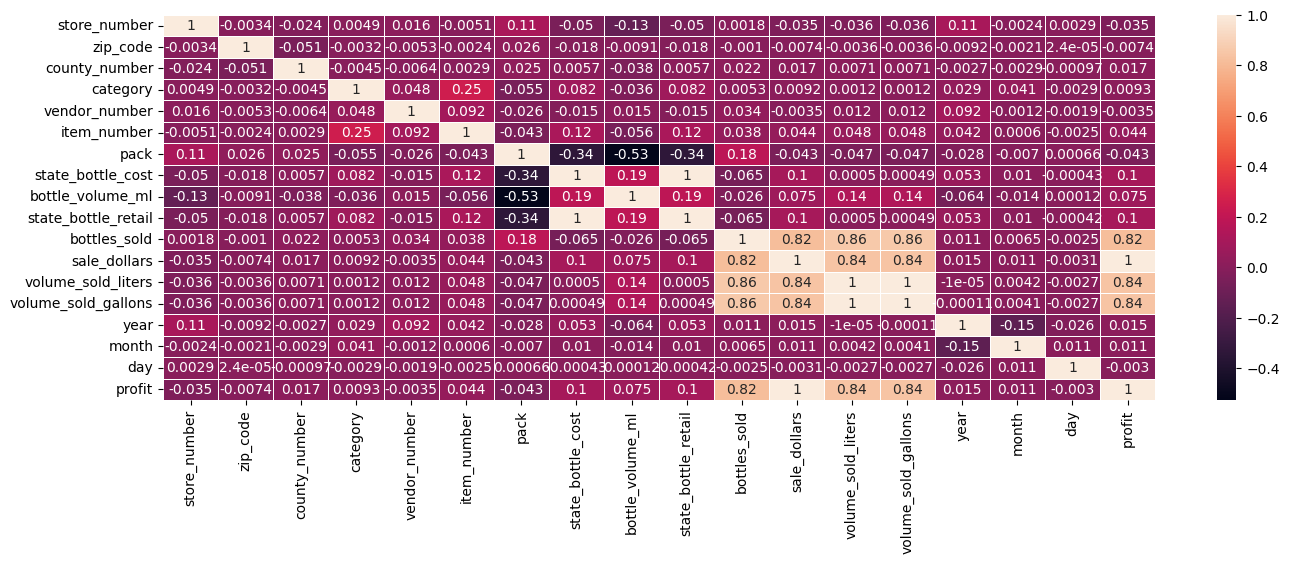

In [17]:
# Heatmap visualization
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.show()

As our main focus here is on Sales in USD. So, we can see from the heatmap displayed above, there is a strong correlation between
- **sale_dollars and bottles_sold**
- **sale_dollars and volume_sold_liters**
- **sale_dollars and volume_sold_gallons**
- **sale_dollars and profit**

Some other correlations are observed in:
- **bottles_sold and volume_sold_liters** and **vice versa**
- **bottles_sold and colume_sold_gallons** and **vice versa**
- **profit and volume_sold_liters** and **vice versa**
- **profit and volume_sold_gallons** and **vice versa**
- **profit and bottles_sold** and **vice versa**

# Exploring Variables

## Categorical Variables

### City

In [19]:
df['city'].describe()

count       11254487
unique           463
top       DES MOINES
freq          933067
Name: city, dtype: object


So there are **463 unique cities** in our dataset with **Des Moines** as the city with the highest number of liquor records with **936021 records**.



In [20]:
city_counts = df["city"].value_counts()
print('Highest Liquor Selling City:',city_counts.head(1))
print('Lowest Liquor Selling City:',city_counts.tail(1))

Highest Liquor Selling City: DES MOINES    933067
Name: city, dtype: int64
Lowest Liquor Selling City: DUNCOMBE    1
Name: city, dtype: int64


Here we can see that **Des Moines** is the city with highest liquor selling records whereas on the other hand **Duncombe** is the lowest in the cities list.

Here are the top 10 Liquor selling cities.

<Axes: xlabel='City'>

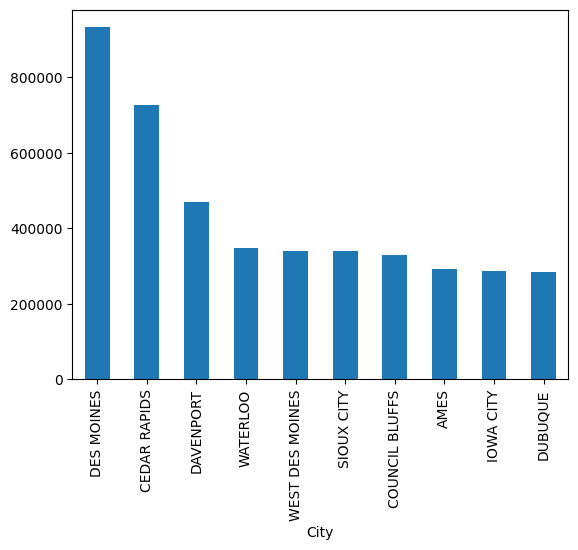

In [21]:
df.groupby('city')['city'].size().sort_values(ascending=False)[:10].plot(kind='bar',xlabel='City')

### Store Name

In [22]:
df['store_name'].describe()

count                         11254487
unique                            2349
top       HY-VEE #3 / BDI / DES MOINES
freq                             85911
Name: store_name, dtype: object

We can see that there are a total of **2349** unique stores in Iowa where **Hy-Vee #3 / BDI / Des Moines** is the most popular one with a frequency of **85911**.

In [23]:
store_counts = df["store_name"].value_counts()
print('Highest Liquor Selling Store:',store_counts.head(1))
print('Lowest Liquor Selling Store:',store_counts.tail(1))

Highest Liquor Selling Store: HY-VEE #3 / BDI / DES MOINES    85911
Name: store_name, dtype: int64
Lowest Liquor Selling Store: CATS EYE DISTILLERY, LLC    1
Name: store_name, dtype: int64


On the ther hand **CATS EYE DISTILLERY, LLC** is the least popular with only **1** record.

Here are the top 10 Liquor selling stores.

<Axes: xlabel='Store Name'>

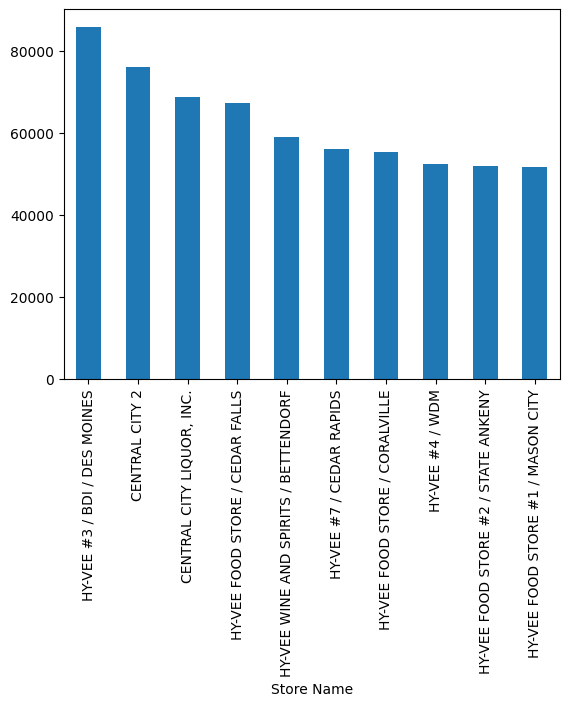

In [24]:
df.groupby('store_name')['store_name'].size().sort_values(ascending=False)[:10].plot(kind='bar',xlabel='Store Name')

### County

In [25]:
df['county'].describe()

count     11254487
unique          99
top           POLK
freq       2106005
Name: county, dtype: object

We can see that there are a total of **99** unique counties in Iowa where **POLK** is the most popular one with a frequency of **2106005**.

In [26]:
county_counts = df["county"].value_counts()
print('Highest Liquor Selling County:',county_counts.head(1))
print('Lowest Liquor Selling County:',county_counts.tail(1))

Highest Liquor Selling County: POLK    2106005
Name: county, dtype: int64
Lowest Liquor Selling County: FREMONT    3014
Name: county, dtype: int64


On the contrary to **POLK** being the highest selling county. **Fremont** is the lowest liquor selling county with only **3104** records.

Here are the top 20 Liquor selling Counties.

<Axes: xlabel='County'>

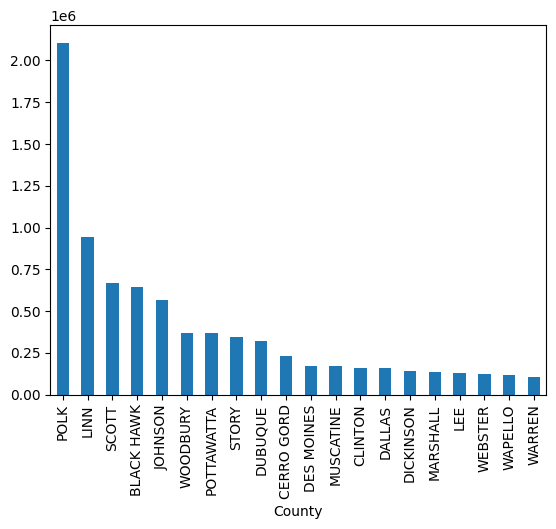

In [27]:
df.groupby('county')['county'].size().sort_values(ascending=False).head(20).plot(kind='bar',xlabel = 'County')

### Category

In [28]:
df['category_name'].describe()

count            11254487
unique                 60
top       AMERICAN VODKAS
freq              1688896
Name: category_name, dtype: object

We can see that there are a total of **60** unique categories where **American Vodkas** is the most popular one with a frequency of **1688896**.

In [29]:
category_count = df['category_name'].value_counts()
print('Highest Liquor Selling Category:',category_count.head(1))
print('Lowest Liquor Selling Category:',category_count.tail(1))

Highest Liquor Selling Category: AMERICAN VODKAS    1688896
Name: category_name, dtype: int64
Lowest Liquor Selling Category: DELISTED / SPECIAL ORDER ITEMS    1
Name: category_name, dtype: int64


On the contrary to **American Vodkas** being the highest selling category. **Delisted / Special Order Items** are the lowest selling category with only **1** record.

**Top 20 Categories**

<Axes: xlabel='Category'>

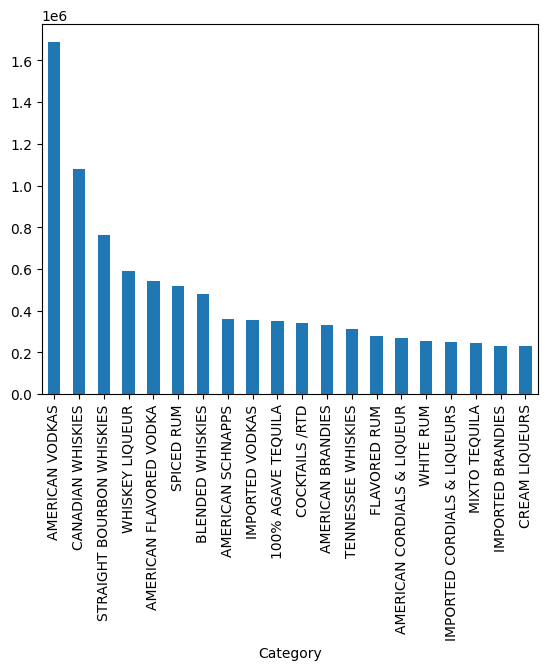

In [30]:
df.groupby('category_name')['category_name'].size().sort_values(ascending=False).head(20).plot(kind='bar',xlabel='Category')

### Vendor

In [31]:
df['vendor_name'].describe()

count            11254487
unique                352
top       DIAGEO AMERICAS
freq              1803373
Name: vendor_name, dtype: object

We can see that there are a total of **352** unique vendors where **Diageo Americas** is the most popular one with a frequency of **1807956**.

In [32]:
vendor_counts = df['vendor_name'].value_counts()
print('Highest Liquor Selling Vendor:',vendor_counts.head(1))
print('Lowest Liquor Selling Vendor:',vendor_counts.tail(1))

Highest Liquor Selling Vendor: DIAGEO AMERICAS    1803373
Name: vendor_name, dtype: int64
Lowest Liquor Selling Vendor: ELIXIR, INC.    1
Name: vendor_name, dtype: int64


**Elixir, INC** is the least popular one with just only **1** record.

**Top 10 Vendors**

<Axes: xlabel='Vendors'>

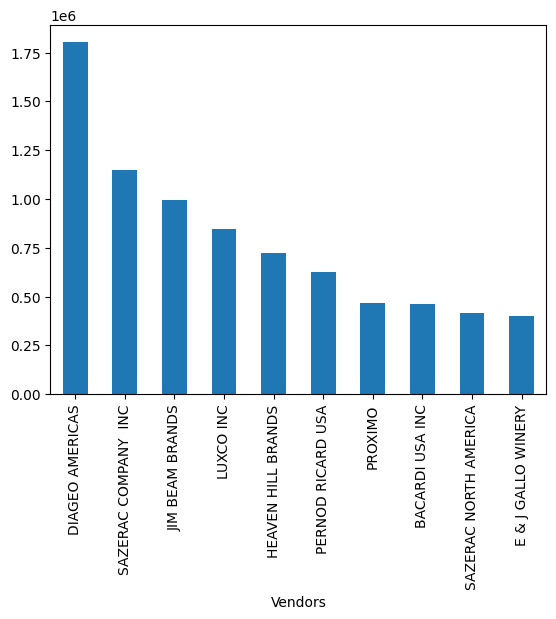

In [33]:
df.groupby('vendor_name')['vendor_name'].size().sort_values(ascending=False).head(10).plot(kind='bar',xlabel='Vendors')

### Item

In [34]:
df['item_description'].describe()

count         11254487
unique            7290
top       BLACK VELVET
freq            275436
Name: item_description, dtype: object

There are a total of **7290** unique items where **Black Velvet** is the most popular one with a frequency of **275436**.

In [35]:
item_counts=df['item_description'].value_counts()
print('Highest Selling Item:',item_counts.head(1))
print('Lowest Selling Item:',item_counts.tail(1))

Highest Selling Item: BLACK VELVET    275436
Name: item_description, dtype: int64
Lowest Selling Item: FAT FENDER BOTANICAL CUCUMBER MINT    1
Name: item_description, dtype: int64


**FAT Fender Botanical Cucmber Mint** is the least popular item with only **1** count.

**Top 10 Items**

<Axes: xlabel='Items'>

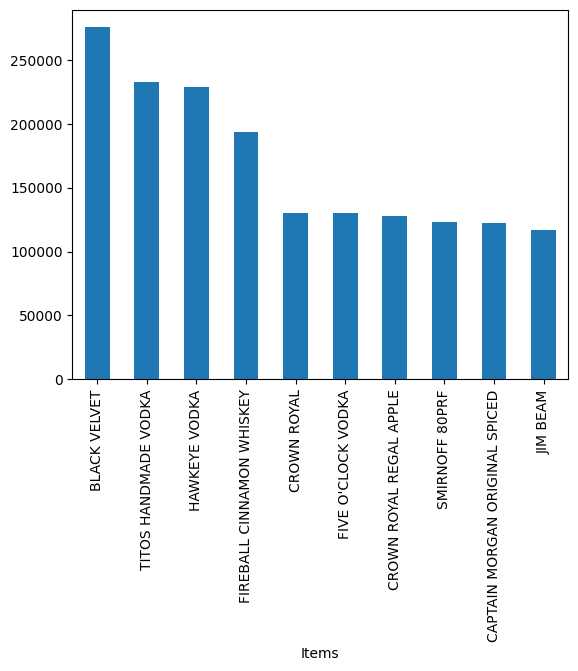

In [36]:
df.groupby('item_description')['item_description'].size().sort_values(ascending=False).head(10).plot(kind='bar',xlabel='Items')

## Quantitative Variables

### Packs

In [37]:
df['pack'].describe()

count    1.125449e+07
mean     1.219697e+01
std      7.990325e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      1.200000e+01
max      1.200000e+02
Name: pack, dtype: float64

From the above code, we can see that there are **$1.12×10^7$** records which have the average packing of **12.19**.

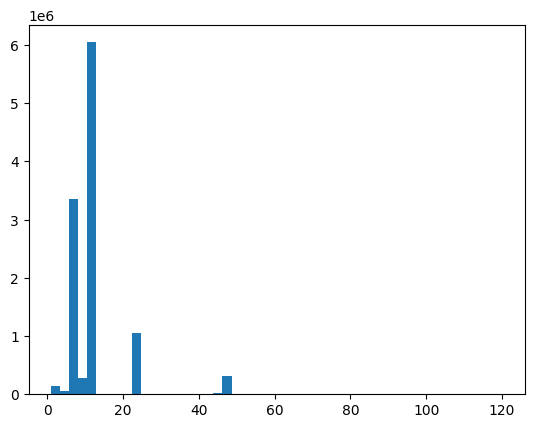

In [38]:
plt.hist(histtype='bar',x=df['pack'],bins=50)
plt.show()

From the above graph, we can see that mostly around **13-15** packs are sold at a single time. <br><br>We can also expect some outliers above **30 packs**.

In [39]:
# Calculating mode, mean, median for quantitative variable (pack)

print('Mode: ', df['pack'].mode())
print('Mean: ', df['pack'].mean())
print('Median: ', df['pack'].median())

Mode:  0    12
Name: pack, dtype: int64
Mean:  12.196972549703954
Median:  12.0


In [40]:
# Calculating min, max, range for quantitative variable (pack)

min_ = df['pack'].min()
max_ = df['pack'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  1
Max:  120
Range:  119


In [41]:
# Calculating quantiles, IQR, outliers for quantitative variable (pack)

Q_25 = df['pack'].quantile(0.25)
Q_75 = df['pack'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['pack'] < Q_25 - 1.5*IQR) | (df['pack'] > Q_75 + 1.5*IQR)]['pack']
print('Outliers: ',outliers)
print('Total Number Of Outliers:',len(outliers))

Inter-Quartile Range: 6.0
Lower Quartile Limit: -3.0
Upper Quartile Limit: 21.0
Outliers:  32          24
33          24
39          44
40          48
41          48
            ..
12061218    24
12061219    24
12061220    24
12061221    24
12061224    24
Name: pack, Length: 1388249, dtype: int64
Total Number Of Outliers: 1388249


Here we can see that there are a total of **1388249** outliers above the **upper Quartile Limit**.

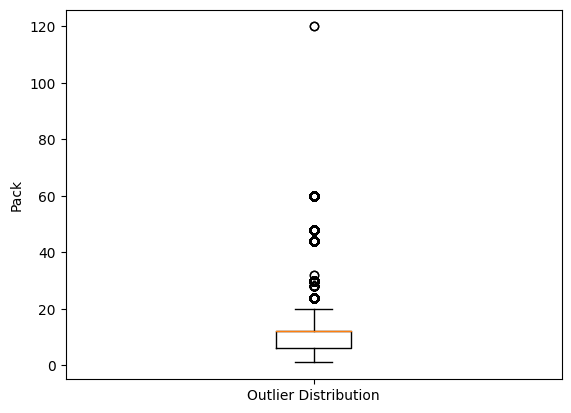

In [42]:
# Plotting Box plot for quantitative variable (pack)

plt.boxplot(x=df['pack'], labels=['Outlier Distribution'])
plt.ylabel('Pack')
plt.show()

Hence proving the above point of having outliers above the **upper Quartile Limit**.

In [43]:
# Calculating standard deviation for quantitative variable (pack)
pack_std = df['pack'].std()
print('Standard Deviation: ' , pack_std)

Standard Deviation:  7.990325268423854


### State Bottle Cost

In [44]:
df['state_bottle_cost'].describe()

count    1.125449e+07
mean     1.082249e+01
std      1.009867e+01
min      3.300000e-01
25%      5.720000e+00
50%      8.660000e+00
75%      1.326000e+01
max      2.198890e+03
Name: state_bottle_cost, dtype: float64

From the above code, we can see that there are **$1.12×10^7$** records which have the average state bottle cost of **\$10.82** USD.

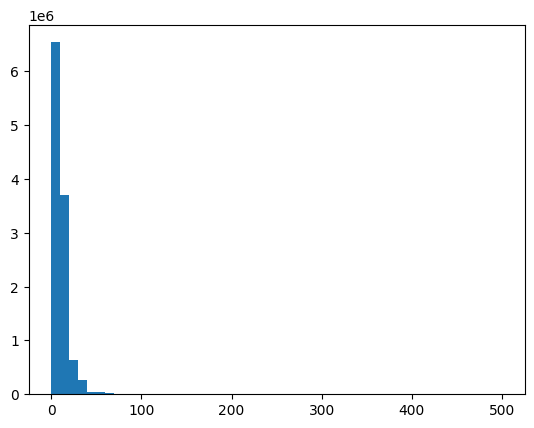

In [45]:
plt.hist(histtype='bar',x=df['state_bottle_cost'],bins=50,range=(0,500))
plt.show()

From the above graph, we can see that most commonly state bottle cost is around **\$10-\$20** USD. But in some cases, a bottle cost is as high as **\$50** USD.

In [46]:
# Calculating mode, mean, median for quantitative variable (state_bottle_cost)

print('Mode: ', df['state_bottle_cost'].mode())
print('Mean: ', df['state_bottle_cost'].mean())
print('Median: ', df['state_bottle_cost'].median())

Mode:  0    7.5
Name: state_bottle_cost, dtype: float64
Mean:  10.822492077159975
Median:  8.66


In [47]:
# Calculating min, max, range for quantitative variable (state_bottle_cost)

min_ = df['state_bottle_cost'].min()
max_ = df['state_bottle_cost'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  0.33
Max:  2198.89
Range:  2198.56


In [48]:
# Calculating quantiles, IQR, outliers for quantitative variable (state_bottle_cost)

Q_25 = df['state_bottle_cost'].quantile(0.25)
Q_75 = df['state_bottle_cost'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['state_bottle_cost'] < Q_25 - 1.5*IQR) | (df['state_bottle_cost'] > Q_75 + 1.5*IQR)]['state_bottle_cost']
print('Outliers: ',outliers)
print('Total Number Of Outliers: ',len(outliers))

Inter-Quartile Range: 7.54
Lower Quartile Limit: -5.590000000000001
Upper Quartile Limit: 24.57
Outliers:  18          30.00
19          30.00
36          27.50
38          25.98
45          27.50
            ...  
12043647    42.50
12048689    42.00
12048994    59.99
12053533    54.99
12053934    59.99
Name: state_bottle_cost, Length: 651345, dtype: float64
Total Number Of Outliers:  651345


Here we can see that there are a total of **651345** outliers above the **upper Quartile Limit**.

Text(0, 0.5, 'State Bottle Cost')

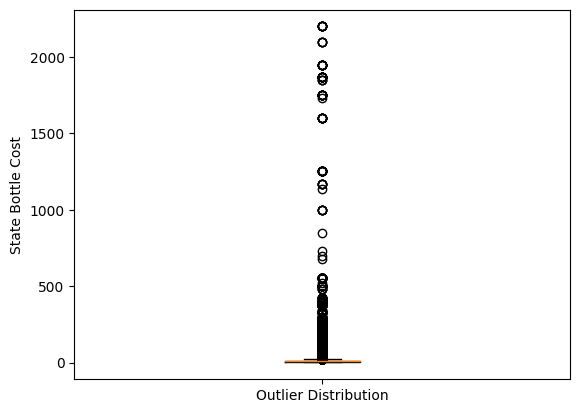

In [49]:
# Plotting Box plot for quantitative variable (state_bottle_cost)

plt.boxplot(x=df['state_bottle_cost'], labels=['Outlier Distribution'])
plt.ylabel('State Bottle Cost')

Hence, proving our claim.

In [50]:
# Calculating standard deviation for quantitative variable (state_bottle_cost)
state_bottle_cost_std = df['state_bottle_cost'].std()
print('Standard Deviation: ' , state_bottle_cost_std)

Standard Deviation:  10.09866841270404


### Bottle Volume ml

In [51]:
df['bottle_volume_ml'].describe()

count    1.125449e+07
mean     8.553827e+02
std      5.240859e+02
min      2.000000e+01
25%      6.000000e+02
50%      7.500000e+02
75%      1.000000e+03
max      6.000000e+03
Name: bottle_volume_ml, dtype: float64

From the above code, we can see that there are **$1.12×10^7$** records which have the average bottle volume of around **855.46** ml.

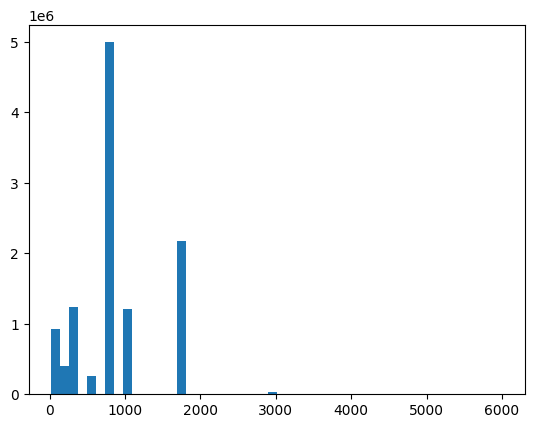

In [52]:
plt.hist(histtype='bar',x=df['bottle_volume_ml'],bins=50)
plt.show()

From the above graph, we can see that most commonly a bottle of **750 ml** is bought followed by around **1.5 - 1.75** Liters. There are some cases in which people have bought bottles of around **3 Liters**.

In [53]:
# Calculating mode, mean, median for quantitative variable (bottle_volume_ml)

print('Mode: ', df['bottle_volume_ml'].mode())
print('Mean: ', df['bottle_volume_ml'].mean())
print('Median: ', df['bottle_volume_ml'].median())

Mode:  0    750
Name: bottle_volume_ml, dtype: int64
Mean:  855.3826894997524
Median:  750.0


In [54]:
# Calculating min, max, range for quantitative variable (bottle_volume_ml)

min_ = df['bottle_volume_ml'].min()
max_ = df['bottle_volume_ml'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  20
Max:  6000
Range:  5980


In [55]:
# Calculating quantiles, IQR, outliers for quantitative variable (bottle_volume_ml)

Q_25 = df['bottle_volume_ml'].quantile(0.25)
Q_75 = df['bottle_volume_ml'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['bottle_volume_ml'] < Q_25 - 1.5*IQR) | (df['bottle_volume_ml'] > Q_75 + 1.5*IQR)]['bottle_volume_ml']
print('Outliers: ',outliers)
print('Total Number of Outliers:', len(outliers))

Inter-Quartile Range: 400.0
Lower Quartile Limit: 0.0
Upper Quartile Limit: 1600.0
Outliers:  0           1750
1           1750
8           1750
9           1750
10          1750
            ... 
11237495    3000
11245738    3000
11256886    3000
11256887    3000
11265915    3000
Name: bottle_volume_ml, Length: 2215645, dtype: int64
Total Number of Outliers: 2215645


Here we can see that there are a total of **2215645** outliers above the **upper Quartile Limit**.

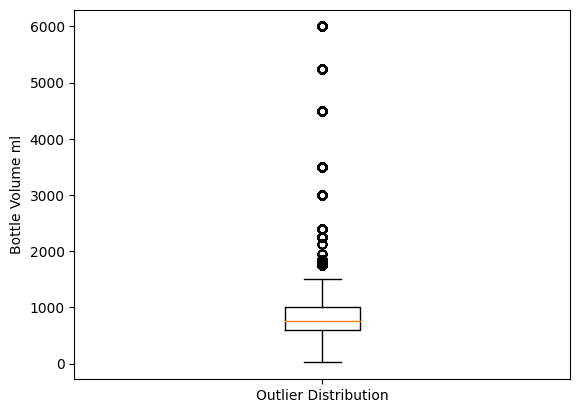

In [56]:
# Plotting Box plot for quantitative variable (bottle_volume_ml)

plt.boxplot(x=df['bottle_volume_ml'], labels=['Outlier Distribution'])
plt.ylabel('Bottle Volume ml')
plt.show()

Hence proving our claim.

In [57]:
# Calculating standard deviation for quantitative variable (bottle_volume_ml)
bottle_volume_ml_std = df['bottle_volume_ml'].std()
print('Standard Deviation: ' , bottle_volume_ml_std)

Standard Deviation:  524.0859231448619


### State Bottle Retail

In [58]:
df['state_bottle_retail'].describe()

count    1.125449e+07
mean     1.623561e+01
std      1.514758e+01
min      5.000000e-01
25%      8.580000e+00
50%      1.299000e+01
75%      1.989000e+01
max      3.298340e+03
Name: state_bottle_retail, dtype: float64

The average State Bottle Retail price is **\$16.23** USD.

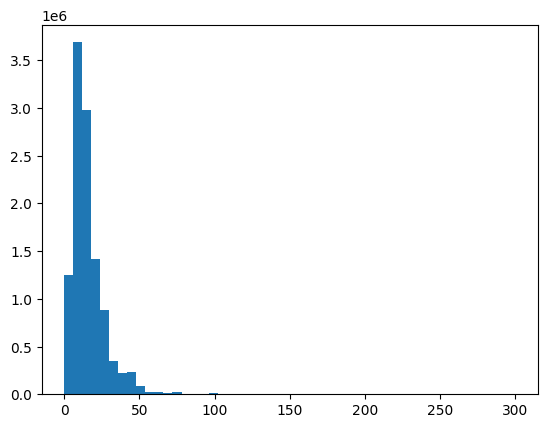

In [59]:
plt.hist(histtype='bar',x=df['state_bottle_retail'],bins=50,range=(0,300))
plt.show()

From the above graph, we can see that the most common state retail price is between **\$10 - \$30** USD with an occasional retail price of around **\$100** USD.

In [60]:
# Calculating mode, mean, median for quantitative variable (state_bottle_retail)

print('Mode: ', df['state_bottle_retail'].mode())
print('Mean: ', df['state_bottle_retail'].mean())
print('Median: ', df['state_bottle_retail'].median())

Mode:  0    11.25
Name: state_bottle_retail, dtype: float64
Mean:  16.235611653378793
Median:  12.99


In [61]:
# Calculating min, max, range for quantitative variable (state_bottle_retail)

min_ = df['state_bottle_retail'].min()
max_ = df['state_bottle_retail'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  0.5
Max:  3298.34
Range:  3297.84


In [62]:
# Calculating quantiles, IQR, outliers for quantitative variable (state_bottle_retail)

Q_25 = df['state_bottle_retail'].quantile(0.25)
Q_75 = df['state_bottle_retail'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['state_bottle_retail'] < Q_25 - 1.5*IQR) | (df['state_bottle_retail'] > Q_75 + 1.5*IQR)]['state_bottle_retail']
print('Outliers: ',outliers)
print('Total number of Outliers:',len(outliers))

Inter-Quartile Range: 11.31
Lower Quartile Limit: -8.385
Upper Quartile Limit: 36.855000000000004
Outliers:  18          45.00
19          45.00
36          41.25
38          38.97
45          41.25
            ...  
12043647    63.75
12048689    63.00
12048994    89.99
12053533    82.49
12053934    89.99
Name: state_bottle_retail, Length: 651344, dtype: float64
Total number of Outliers: 651344


We can see that there are **651344** outliers above the **upper Quartile Limit**.

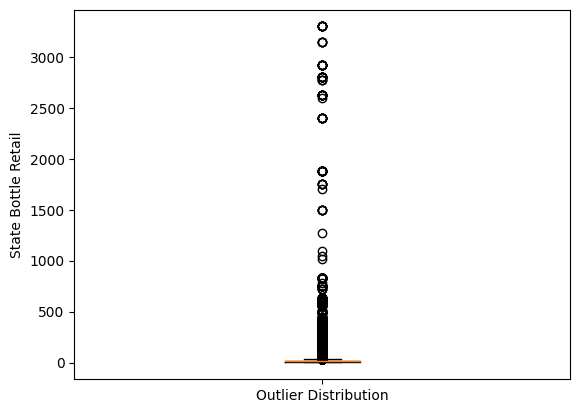

In [63]:
# Plotting Box plot for quantitative variable (state_bottle_retail)

plt.boxplot(x=df['state_bottle_retail'], labels=['Outlier Distribution'])
plt.ylabel('State Bottle Retail')
plt.show()

Hence proving our claim.

In [64]:
# Calculating standard deviation for quantitative variable (state_bottle_retail)
state_bottle_retail_std = df['state_bottle_retail'].std()
print('Standard Deviation: ' , state_bottle_retail_std)

Standard Deviation:  15.14758252228938


### Bottles Sold

In [65]:
df['bottles_sold'].describe()

count    1.125449e+07
mean     1.140383e+01
std      3.300363e+01
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.200000e+01
max      1.320000e+04
Name: bottles_sold, dtype: float64

We can see from the above code that on an average **11.41** bottles are sold. 

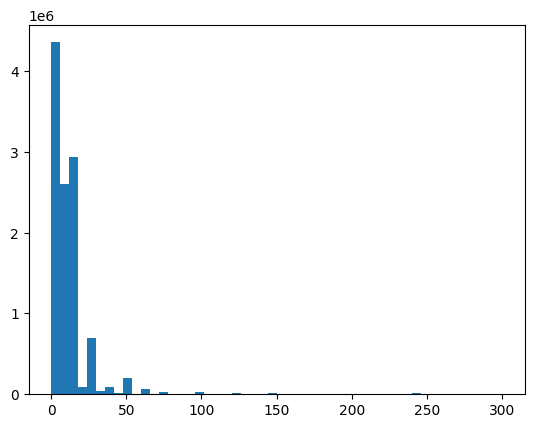

In [66]:
plt.hist(histtype='bar',x=df['bottles_sold'],bins=50,range=(0,300))
plt.show()

From the above graph, we can conclude that most of the bottles sold are between **0-10** with an occasional sales of bottles from **100-150**.

In [67]:
# Calculating mode, mean, median for quantitative variable (bottles_sold)

print('Mode: ', df['bottles_sold'].mode())
print('Mean: ', df['bottles_sold'].mean())
print('Median: ', df['bottles_sold'].median())

Mode:  0    12
Name: bottles_sold, dtype: int64
Mean:  11.403833155611624
Median:  6.0


In [68]:
# Calculating min, max, range for quantitative variable (bottles_sold)

min_ = df['bottles_sold'].min()
max_ = df['bottles_sold'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  0
Max:  13200
Range:  13200


In [69]:
# Calculating quantiles, IQR, outliers for quantitative variable (bottles_sold)

Q_25 = df['bottles_sold'].quantile(0.25)
Q_75 = df['bottles_sold'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df.bottles_sold < Q_25 - 1.5*IQR) | (df.bottles_sold > Q_75 + 1.5*IQR)]['bottles_sold']
print('Outliers: ',outliers)
print('Total Number Of Outliers:', len(outliers))

Inter-Quartile Range: 9.0
Lower Quartile Limit: -10.5
Upper Quartile Limit: 25.5
Outliers:  0            54
1           108
16           36
24           36
34           36
           ... 
12031477     30
12031933     30
12033490     30
12033732     30
12033957     30
Name: bottles_sold, Length: 576207, dtype: int64
Total Number Of Outliers: 576207


We can see that there are **576207** outliers above the **upper Quartile Limit**.

Text(0, 0.5, 'Bottles Sold')

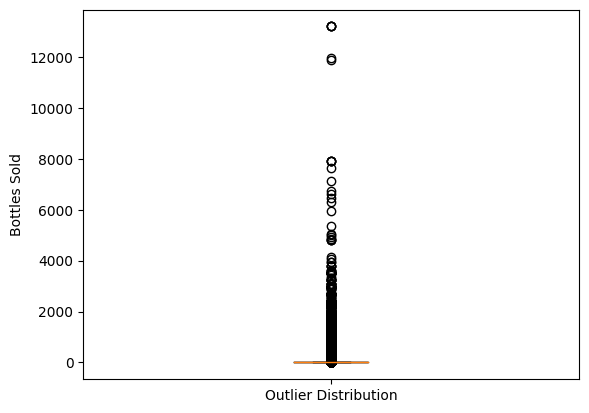

In [70]:
# Plotting Box plot for quantitative variable (bottles_sold)

plt.boxplot(x=df['bottles_sold'], labels=['Outlier Distribution'])
plt.ylabel('Bottles Sold')

Hence proving our point.

In [71]:
# Calculating standard deviation for quantitative variable (bottles_sold)
bottles_sold_std = df['bottles_sold'].std()
print('Standard Deviation: ' , bottles_sold_std)

Standard Deviation:  33.00363324616205


### Sale Dollars

In [72]:
df['sale_dollars'].describe()

count    1.125449e+07
mean     1.523474e+02
std      5.363166e+02
min      0.000000e+00
25%      3.720000e+01
50%      8.016000e+01
75%      1.575000e+02
max      2.795573e+05
Name: sale_dollars, dtype: float64

We can see from the above code, that the average liquor sales is around **\$152** USD.

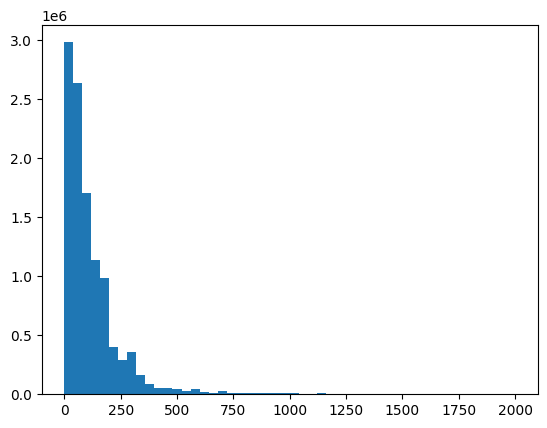

In [73]:
plt.hist(histtype='bar',x=df['sale_dollars'],bins=50,range=(0,2000))
plt.show()

From the above graph, we can see that most of the sales are between around **\$8-\$20** USD with an occasional sales of more than **\$600** USD.

In [74]:
# Calculating mode, mean, median for quantitative variable (sale_dollars)

print('Mode: ', df['sale_dollars'].mode())
print('Mean: ', df['sale_dollars'].mean())
print('Median: ', df['sale_dollars'].median())

Mode:  0    90.0
Name: sale_dollars, dtype: float64
Mean:  152.347373848315
Median:  80.16


In [75]:
# Calculating min, max, range for quantitative variable (sale_dollars)

min_ = df['sale_dollars'].min()
max_ = df['sale_dollars'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  0.0
Max:  279557.28
Range:  279557.28


In [76]:
# Calculating quantiles, IQR, outliers for quantitative variable (sale_dollars)

Q_25 = df['sale_dollars'].quantile(0.25)
Q_75 = df['sale_dollars'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['sale_dollars'] < Q_25 - 1.5*IQR) | (df['sale_dollars'] > Q_75 + 1.5*IQR)]['sale_dollars']
print('Outliers: ',outliers)
print('Total Number Of Outliers:',len(outliers))

Inter-Quartile Range: 120.3
Lower Quartile Limit: -143.25
Upper Quartile Limit: 337.95
Outliers:  0            581.04
1           3078.00
13           499.50
16           579.96
24           620.64
             ...   
12024730     390.00
12028842     473.56
12031226     459.82
12031399     385.50
12033189     525.82
Name: sale_dollars, Length: 695901, dtype: float64
Total Number Of Outliers: 695901


There are **695901** outliers all above the **upper Quartile Limit**.


Text(0, 0.5, 'Sale Dollars')

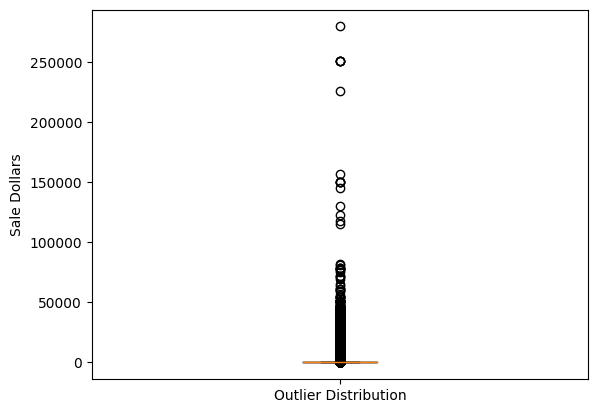

In [77]:
# Plotting Box plot for quantitative variable (sale_dollars)

plt.boxplot(x=df['sale_dollars'], labels=['Outlier Distribution'])
plt.ylabel('Sale Dollars')

In [78]:
# Calculating standard deviation for quantitative variable (sale_dollars)
sale_dollars_std = df['sale_dollars'].std()
print('Standard Deviation: ' , sale_dollars_std)

Standard Deviation:  536.316616160205


### Volume Sold Liters

In [79]:
df['volume_sold_liters'].describe()

count    1.125449e+07
mean     9.313108e+00
std      3.908564e+01
min      2.000000e-02
25%      1.500000e+00
50%      4.800000e+00
75%      1.050000e+01
max      1.320000e+04
Name: volume_sold_liters, dtype: float64

We can see from the above code, that the average volume sold is **9 Liters**.

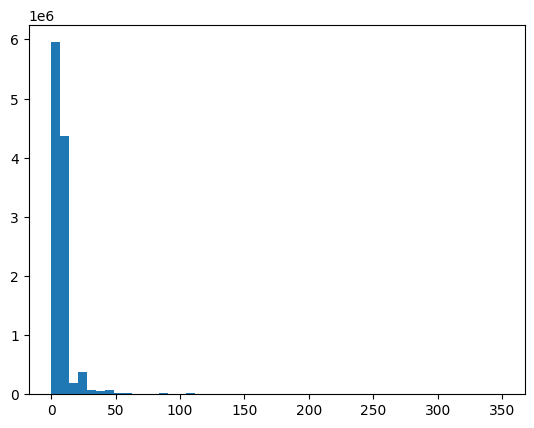

In [80]:
plt.hist(histtype='bar',x=df['volume_sold_liters'],bins=50,range=(0,350))
plt.show()

Here we can see that volume of **0-10** Liters is more common and we can also estimate some outliers above  **50** Liters.

In [81]:
# Calculating mode, mean, median for quantitative variable (volume_sold_liters)

print('Mode: ', df['volume_sold_liters'].mode())
print('Mean: ', df['volume_sold_liters'].mean())
print('Median: ', df['volume_sold_liters'].median())

Mode:  0    9.0
Name: volume_sold_liters, dtype: float64
Mean:  9.313108394012085
Median:  4.8


In [82]:
# Calculating min, max, range for quantitative variable (volume_sold_liters)

min_ = df['volume_sold_liters'].min()
max_ = df['volume_sold_liters'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  0.02
Max:  13200.0
Range:  13199.98


In [83]:
# Calculating quantiles, IQR, outliers for quantitative variable (volume_sold_liters)

Q_25 = df['volume_sold_liters'].quantile(0.25)
Q_75 = df['volume_sold_liters'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['volume_sold_liters'] < Q_25 - 1.5*IQR) | (df['volume_sold_liters'] > Q_75 + 1.5*IQR)]['volume_sold_liters']
print('Outliers: ',outliers)
print('Total number of Outliers:',len(outliers))

Inter-Quartile Range: 9.0
Lower Quartile Limit: -12.0
Upper Quartile Limit: 24.0
Outliers:  0            94.5
1           189.0
34           27.0
35           27.0
36           27.0
            ...  
10841841     31.5
10841842     31.5
10841843     31.5
10841844     31.5
10841845     31.5
Name: volume_sold_liters, Length: 416637, dtype: float64
Total number of Outliers: 416637


There are a total of **416637** outliers all above the **upper Quartile Limit**.

Text(0, 0.5, 'volume_sold_liters')

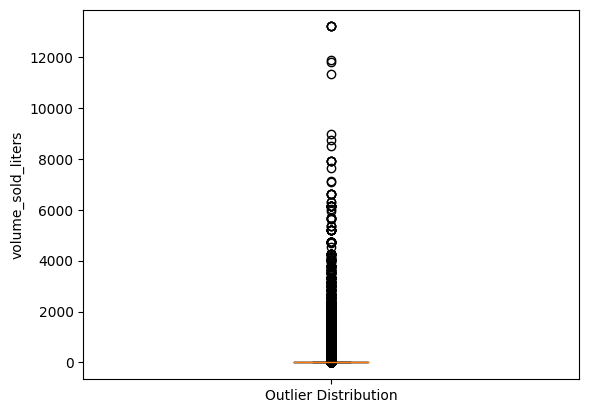

In [84]:
# Plotting Box plot for quantitative variable (volume_sold_liters)

plt.boxplot(x=df['volume_sold_liters'], labels=['Outlier Distribution'])
plt.ylabel('volume_sold_liters')

Hence proving our claim.

In [85]:
# Calculating standard deviation for quantitative variable (volume_sold_liters)
volume_sold_liters_std = df['volume_sold_liters'].std()
print('Standard Deviation: ' , volume_sold_liters_std)

Standard Deviation:  39.08563791769917


### Volume Sold Gallons

In [86]:
df['volume_sold_gallons'].describe()

count    1.125449e+07
mean     2.455411e+00
std      1.032551e+01
min      0.000000e+00
25%      3.900000e-01
50%      1.260000e+00
75%      2.770000e+00
max      3.487070e+03
Name: volume_sold_gallons, dtype: float64

We can see from the above code, that the average volume sold is **2.45 gallons**.

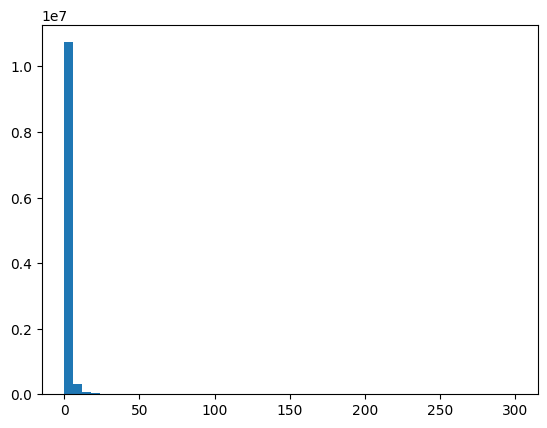

In [87]:
plt.hist(histtype='bar',x=df['volume_sold_gallons'],bins=50,range=(0,300))
plt.show()

Here we can see that volume of **0-10** gallons is more common and we can also estimate some outliers above  **25** gallons.

In [88]:
# Calculating mode, mean, median for quantitative variable (volume_sold_gallons)

print('Mode: ', df['volume_sold_gallons'].mode())
print('Mean: ', df['volume_sold_gallons'].mean())
print('Median: ', df['volume_sold_gallons'].median())

Mode:  0    2.37
Name: volume_sold_gallons, dtype: float64
Mean:  2.4554110800430116
Median:  1.26


In [89]:
# Calculating min, max, range for quantitative variable (volume_sold_gallons)

min_ = df['volume_sold_gallons'].min()
max_ = df['volume_sold_gallons'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  0.0
Max:  3487.07
Range:  3487.07


In [90]:
# Calculating quantiles, IQR, outliers for quantitative variable (volume_sold_gallons)

Q_25 = df['volume_sold_gallons'].quantile(0.25)
Q_75 = df['volume_sold_gallons'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['volume_sold_gallons'] < Q_25 - 1.5*IQR) | (df['volume_sold_gallons'] > Q_75 + 1.5*IQR)]['volume_sold_gallons']
print('Outliers: ',outliers)
print('Total Number of Outliers:', len(outliers))

Inter-Quartile Range: 2.38
Lower Quartile Limit: -3.1799999999999997
Upper Quartile Limit: 6.34
Outliers:  0           24.96
1           49.92
34           7.13
35           7.13
36           7.13
            ...  
10841841     8.32
10841842     8.32
10841843     8.32
10841844     8.32
10841845     8.32
Name: volume_sold_gallons, Length: 416637, dtype: float64
Total Number of Outliers: 416637


There are a total of **416637** outliers all above the **upper Quartile Limit**.

Text(0, 0.5, 'Volume Sold gallons')

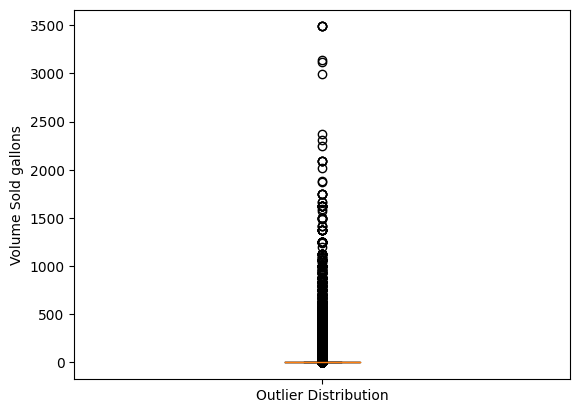

In [91]:
# Plotting Box plot for quantitative variable (volume_sold_gallons)

plt.boxplot(x=df['volume_sold_gallons'], labels=['Outlier Distribution'])
plt.ylabel('Volume Sold gallons')

In [92]:
# Calculating standard deviation for quantitative variable (volume_sold_gallons)
volume_sold_gallons_std = df['volume_sold_gallons'].std()
print('Standard Deviation: ' , volume_sold_gallons_std)

Standard Deviation:  10.325510765518246


### Profit

In [93]:
df['profit'].describe()

count    1.125449e+07
mean     5.085113e+01
std      1.789839e+02
min     -2.901960e+03
25%      1.242000e+01
50%      2.676000e+01
75%      5.250000e+01
max      9.322560e+04
Name: profit, dtype: float64

We can see from the above code, that the average profit is around **\$50.85** USD.

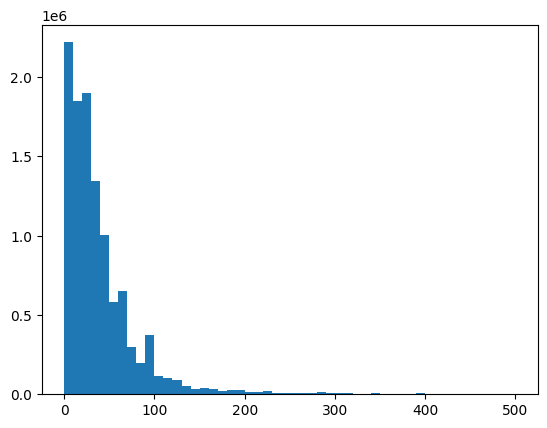

In [94]:
plt.hist(histtype='bar',x=df['profit'],bins=50,range=(0,500))
plt.show()

Here we can mostly see the profit between **\$0-\$10** USD and we can also estimate some outliers above  **\$225** USD.

In [95]:
# Calculating mode, mean, median for quantitative variable (profit)

print('Mode: ', df['profit'].mode())
print('Mean: ', df['profit'].mean())
print('Median: ', df['profit'].median())

Mode:  0    30.0
Name: profit, dtype: float64
Mean:  50.85113422584258
Median:  26.759999999999994


In [96]:
# Calculating min, max, range for quantitative variable (profit)

min_ = df['profit'].min()
max_ = df['profit'].max()
range_ = max_ - min_
print('Min: ', min_)
print('Max: ',max_)
print('Range: ',range_)

Min:  -2901.96
Max:  93225.6
Range:  96127.56000000001


We can also see some loss of around **\$-2901.96** USD.

In [97]:
# Calculating quantiles, IQR, outliers for quantitative variable (profit)

Q_25 = df['profit'].quantile(0.25)
Q_75 = df['profit'].quantile(0.75)
IQR = Q_75 - Q_25

print('Inter-Quartile Range:', IQR)
print('Lower Quartile Limit:',Q_25 - 1.5*IQR)
print('Upper Quartile Limit:',Q_75 + 1.5*IQR)

outliers = df[(df['profit'] < Q_25 - 1.5*IQR) | (df['profit'] > Q_75 + 1.5*IQR)]['profit']
print('Outliers: ',outliers)
print('Total Number of Outliers:', len(outliers))

Inter-Quartile Range: 40.08
Lower Quartile Limit: -47.699999999999996
Upper Quartile Limit: 112.62
Outliers:  0            193.86
1           1026.00
13           166.50
16           193.32
24           207.00
             ...   
12024730     130.00
12028842     157.86
12031226     153.28
12031399     128.50
12033189     175.28
Name: profit, Length: 696935, dtype: float64
Total Number of Outliers: 696935


There are a total of **696935** outliers both above the **upper Quartile Limit** and below the **lower Quartile Limit**.

Text(0, 0.5, 'Profit')

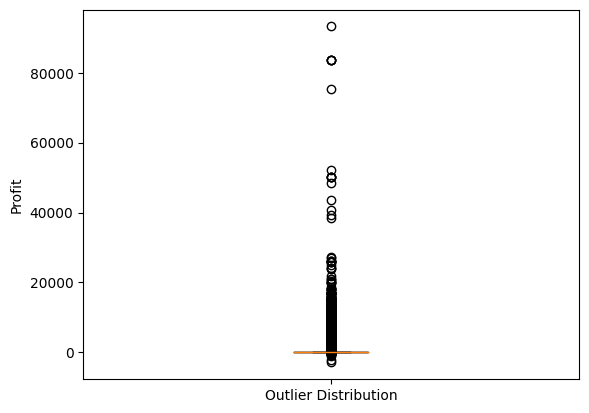

In [98]:
# Plotting Box plot for quantitative variable (profit)

plt.boxplot(x=df['profit'], labels=['Outlier Distribution'])
plt.ylabel('Profit')

Here we can see, that there are outliers on both upper and lower side of the Quartile Limits.

In [99]:
# Calculating standard deviation for quantitative variable (profit)
profit_std = df['profit'].std()
print('Standard Deviation: ' , profit_std)

Standard Deviation:  178.98387802225736


# Exploring Important Relationships

## Categorical -> Quantitative

### Sales By City

In [100]:
df['city'].unique().tolist()

['CORALVILLE',
 'IOWA CITY',
 'MONTICELLO',
 'CEDAR FALLS',
 'GRINNELL',
 'MARION',
 'ANKENY',
 'FAIRBANK',
 'WEST DES MOINES',
 'WAPELLO',
 'NORWALK',
 'ALGONA',
 'DAVENPORT',
 'WAUKON',
 'FORT DODGE',
 'DURANT',
 'PLEASANT HILL',
 'CEDAR RAPIDS',
 'WOODBINE',
 'WILLIAMSBURG',
 'CLINTON',
 'AMES',
 'DES MOINES',
 'MUSCATINE',
 'COUNCIL BLUFFS',
 'BETTENDORF',
 'WAUKEE',
 'MITCHELLVILLE',
 'BONDURANT',
 'INDEPENDENCE',
 'DUBUQUE',
 'ARNOLDS PARK',
 'SPIRIT LAKE',
 'CARROLL',
 'WINDSOR HEIGHTS',
 'HOLY CROSS',
 'OELWEIN',
 'LAKE MILLS',
 'MASON CITY',
 'BELLE PLAINE',
 'MOUNT VERNON',
 'CENTERVILLE',
 'WATERLOO',
 'URBANDALE',
 'OSKALOOSA',
 'GRIMES',
 'PERRY',
 'OSCEOLA',
 'GLENWOOD',
 'BURLINGTON',
 'MARSHALLTOWN',
 'LE MARS',
 'PELLA',
 'SWISHER',
 'OTTUMWA',
 'ANAMOSA',
 'MANCHESTER',
 'NEVADA',
 'FORT MADISON',
 'DYERSVILLE',
 'SIOUX RAPIDS',
 'KEOSAUQUA',
 'IDA GROVE',
 'ATLANTIC',
 'CHARLES CITY',
 'CLERMONT',
 'ROCK RAPIDS',
 'FAIRFIELD',
 'TRAER',
 'HAWARDEN',
 'CLEARLAKE',
 'B

**Now , let's see the sales of liquor per top 20 cities**

In [101]:
df_plot = df.fillna('NA').groupby(['city','pack','date'])['sale_dollars'].sum().groupby(
            ['city','pack']).max().sort_values().groupby(
            ['city']).sum().sort_values(ascending=False)
top_count1_map = pd.DataFrame(df_plot)
top_count1_map = pd.DataFrame(df_plot.head(20))

fig_reg = px.bar(top_count1_map,x=top_count1_map.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per city",
    xaxis_title=" City Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

We can see from the abve graph that even though **Des Moines** has the highest number of liquor records but still **Urbandale** has the highest sales of liquor with around **$1 Million USD**.

### Category Wise Sales

In [102]:
df['category_name'].describe()

count            11254487
unique                 60
top       AMERICAN VODKAS
freq              1688896
Name: category_name, dtype: object

We have **60 different types** of liquors with **American Vodkas** as the highest selling category.

In [103]:
df_plot = df.fillna('NA').groupby(['category_name','pack','date'])['sale_dollars'].sum().groupby(
            ['category_name','pack']).max().sort_values().groupby(
            ['category_name']).sum().sort_values(ascending=False)
top_count = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(10))

In [104]:
fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per category",
    xaxis_title=" Category Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

From the above graph, we can see that the highest selling liqour categories are **American Vodkas** and **Canadian Whiskies**.

#### Top 5 categories trend over years

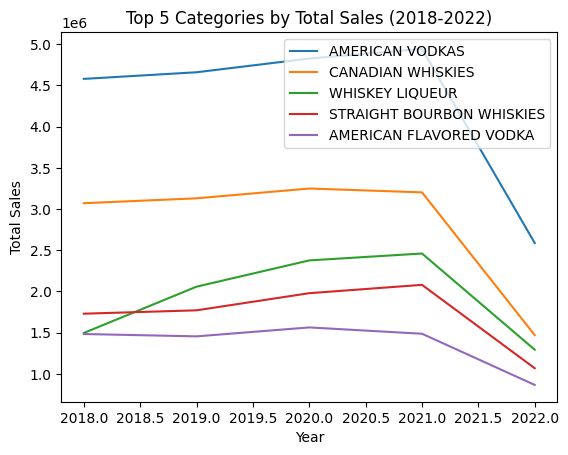

In [105]:
# Group the data by category and year, and sum up the sales for each category-year combination
category_sales_by_year = df.groupby(["category_name", "year"])["pack"].sum()

# Sort the data by total sales in descending order
category_sales_sorted = category_sales_by_year.groupby("category_name").sum().sort_values(ascending=False)

# Select the top 5 vendors based on total sales
top_5_categories = category_sales_sorted.index[:5]

# Create a plot of the total sales of each of the top 5 categories over the last 5 years
for vendor in top_5_categories:
    sales_by_year = category_sales_by_year[vendor]
    plt.plot(sales_by_year.index, sales_by_year.values, label=vendor)

plt.title("Top 5 Categories by Total Sales (2018-2022)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

Here, we can see that American Vodkas and Canadian Whiskies were always a high selling brand since 2018. Notable category is Whisky Liqueur which started at **\$1.5 Million** USD but increased to **\$2.25 Million** USD within half a hear.

### Store Count by Cities

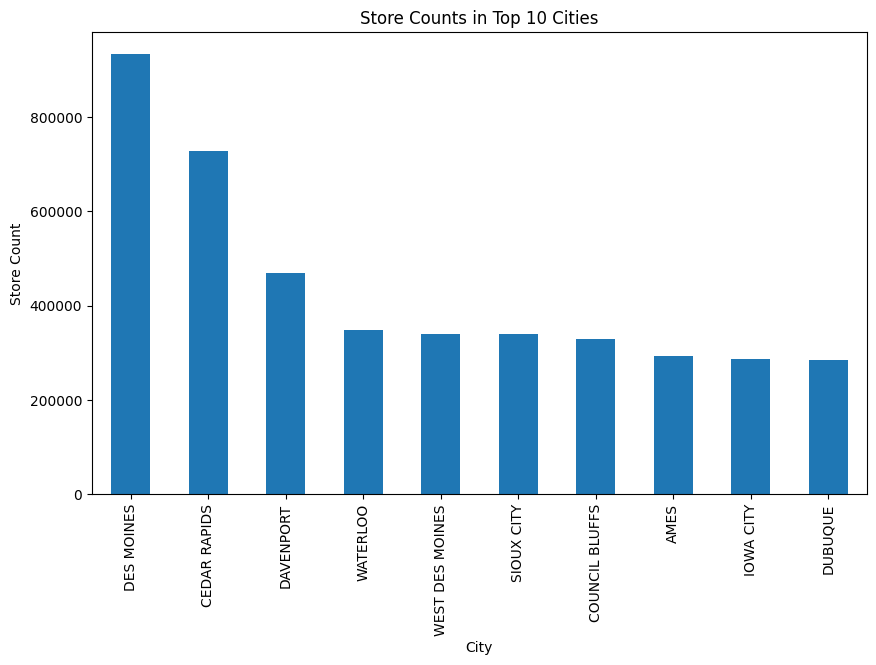

In [106]:
# Get the top 10 cities by store count
top_cities = df['city'].value_counts().nlargest(10)

# Create a bar plot of store counts for the top 10 cities
top_cities.plot(kind='bar', figsize=(10, 6))
plt.title('Store Counts in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Store Count')
plt.show()

### Store Count by County

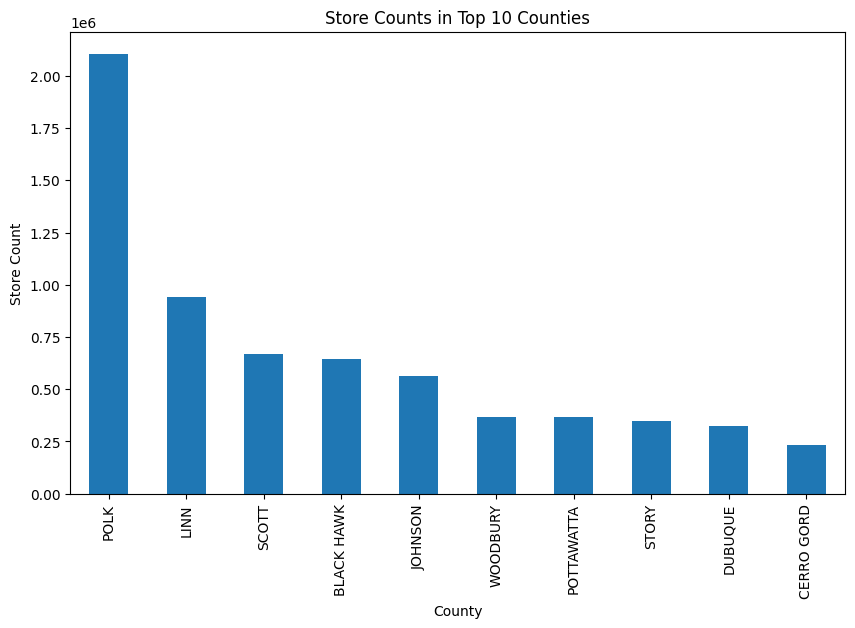

In [107]:
# Get the top 10 cities by store count
top_cities = df['county'].value_counts().nlargest(10)

# Create a bar plot of store counts for the top 10 cities
top_cities.plot(kind='bar', figsize=(10, 6))
plt.title('Store Counts in Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Store Count')
plt.show()

### Monthly Sales

In [108]:
df_plot = df.fillna('NA').groupby(['month','pack','date'])['sale_dollars'].sum().groupby(
            ['month','pack']).max().sort_values().groupby(
            ['month']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(50))

fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Month",
    xaxis_title=" Month Number",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

From the above graph, we can see that both **December** and **October** are the months with highest liquor selling records with **3.25 Million** and **3.23 Million** respectively. This could be a result of either climate change or to celebrate holidays like Christmas and New Year.

### Yearly Sales

In [109]:
yearly_sales = df.groupby('year', as_index=False)['sale_dollars'].sum()

In [110]:
yearly_sales

,year,sale_dollars
0,2018,3.323300e+08
1,2019,3.470649e+08
2,2020,3.954245e+08
3,2021,4.264874e+08
4,2022,2.132848e+08


**Add a comparison of mean values and max values for all years here.**

In [115]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print('Mean:',yearly_sales.groupby('year')['sale_dollars'].mean())

Mean: year
2018   332329989.010
2019   347064898.330
2020   395424454.190
2021   426487436.690
2022   213284760.240
Name: sale_dollars, dtype: float64


The average sales reached an all time high in 2021.

#### Individual Sales Trend over Years

In [116]:
top_count1 = pd.DataFrame(yearly_sales.head(50))

# Individual Year Sales
fig_reg = px.bar(top_count1,x=top_count1['year'], y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Year",
    xaxis_title=" Year",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

We can see an increasing trend in liquor sales even during pandemic.

#### Pack Wise Sales over Years.

In [117]:
# Sales Trend based on packs
df_plot = df.fillna('NA').groupby(['year','pack','date'])['sale_dollars'].sum().groupby(
            ['year','pack']).max().sort_values().groupby(
            ['year']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(50))

fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Year",
    xaxis_title=" Year",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

Here also, We can observe an increasing trend in liquor pack sales even during pandemic.

### Sales By Brand

#### Item Pack sales

In [118]:
# Sales by brand with packaging
df_plot = df.fillna('NA').groupby(['item_description','pack','date'])['sale_dollars'].sum().groupby(
            ['item_description','pack']).max().sort_values().groupby(
            ['item_description']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(50))

fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor by Brand",
    xaxis_title=" Brands",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

From the above graph, we can observe that the packs of **Titos Handmade Vodkas** are the most popular brand or item followed by **Crown Royal**.

#### Individual Item Sales

In [119]:
# Individual Sales by brands
sales_by_brand = df.groupby('item_description', as_index=False)['sale_dollars'].sum()
sales_by_brand = sales_by_brand.sort_values('sale_dollars',ascending=False)
top_count1 = pd.DataFrame(sales_by_brand.head(50))

fig_reg = px.bar(top_count1,x=top_count1['item_description'], y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor per Year",
    xaxis_title=" Brand Name",
    yaxis_title="Sales in dollars",
    )
fig_reg.show()

On the other hand, if we talk about individual bottle sales of various items, we can observe that Titos Handmade Vodkas are still the most popular brand or item followed by Black Velvet.

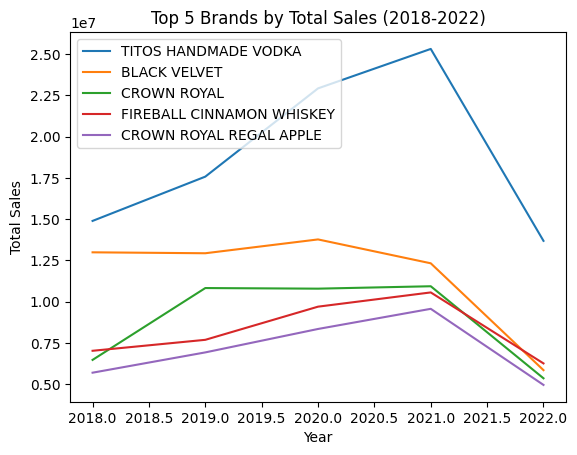

In [122]:
# Group the data by category and year, and sum up the sales for each category-year combination
category_sales_by_year = df.groupby(["item_description", "year"])["sale_dollars"].sum()

# Sort the data by total sales in descending order
category_sales_sorted = category_sales_by_year.groupby("item_description").sum().sort_values(ascending=False)

# Select the top 5 vendors based on total sales
top_5_categories = category_sales_sorted.index[:5]

# Create a plot of the total sales of each of the top 5 categories over the last 5 years
for vendor in top_5_categories:
    sales_by_year = category_sales_by_year[vendor]
    plt.plot(sales_by_year.index, sales_by_year.values, label=vendor)

plt.title("Top 5 Brands by Total Sales (2018-2022)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

From the above graph, we can see sales trend of top 5 brands per year where a very obvious difference can be seen between the top item i.e. **Titos Handmade Vodkas** and rest all items.

### Category with Volume Sold(In Liters)

In [123]:
df_plot = df.fillna('NA').groupby(['category_name','pack','date'])['sale_dollars'].sum().groupby(
            ['category_name','pack']).max().sort_values().groupby(
            ['category_name']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
#top_count1 = pd.DataFrame(df_plot.head(10))

df_plot = df.fillna('NA').groupby(['category_name','pack','date'])['volume_sold_liters'].sum().groupby(
            ['category_name','pack']).max().sort_values().groupby(
            ['category_name']).sum().sort_values(ascending=False)
top_count2 = pd.DataFrame(df_plot)
#top_count2 = pd.DataFrame(df_plot.head(10))

In [124]:
top_count = pd.concat([top_count1 , top_count2],axis=1)
top_count = top_count.sort_values(['sale_dollars'],ascending=False)[:10]
top_count

,sale_dollars,volume_sold_liters
category_name,,
AMERICAN VODKAS,879973.570,66600.140
CANADIAN WHISKIES,787482.900,45270.670
STRAIGHT BOURBON WHISKIES,665196.820,20375.140
TEMPORARY & SPECIALTY PACKAGES,500540.490,15912.320
IMPORTED BRANDIES,470532.010,9212.690
SPICED RUM,409173.210,25393.080
IMPORTED VODKAS,346265.860,22988.910
100% AGAVE TEQUILA,311797.440,10875.870
WHISKEY LIQUEUR,303132.160,17449.510


In [125]:
fig = go.Figure(data=[
    go.Bar(name='Sale In Dollars',x=top_count.index, y=top_count['sale_dollars']),
    go.Bar(name='Volume in liters',x=top_count.index, y=top_count['volume_sold_liters'])
])
# Change the bar mode
fig.update_layout(barmode='group',title="Sales of liquors with category and the volume of liquor sold.",
    xaxis_title="Category",
    yaxis_title="Sale and the amount of liquor sold in liter.",)
fig.show()

From the above graph, we can create an indirect relation between volume of Liters sold with sales where again **American Vodkas** stays at the top followed by **Canadian Whiskies**.

### Volume Sold by Vendor's Name

In [126]:
df_plot = df.fillna('NA').groupby(['vendor_name','pack','date'])['volume_sold_liters'].sum().groupby(
            ['vendor_name','pack']).max().sort_values().groupby(
            ['vendor_name']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
#top_count1 = pd.DataFrame(df_plot.head(50))

fig_reg = px.bar(top_count1,x=top_count1.index, y='volume_sold_liters',color='volume_sold_liters')
fig_reg.update_layout(
    title="Volume sold by vendor name",
    xaxis_title=" Vendor Name",
    yaxis_title="Liquor sold in Liters",
    )
fig_reg.show()

**Sazerac Company Inc** is the highest liquor selling vedor with a record of selling **58K** Liters followed by **Sazerac North America** with **53K** Liters.

### Sales affected by County

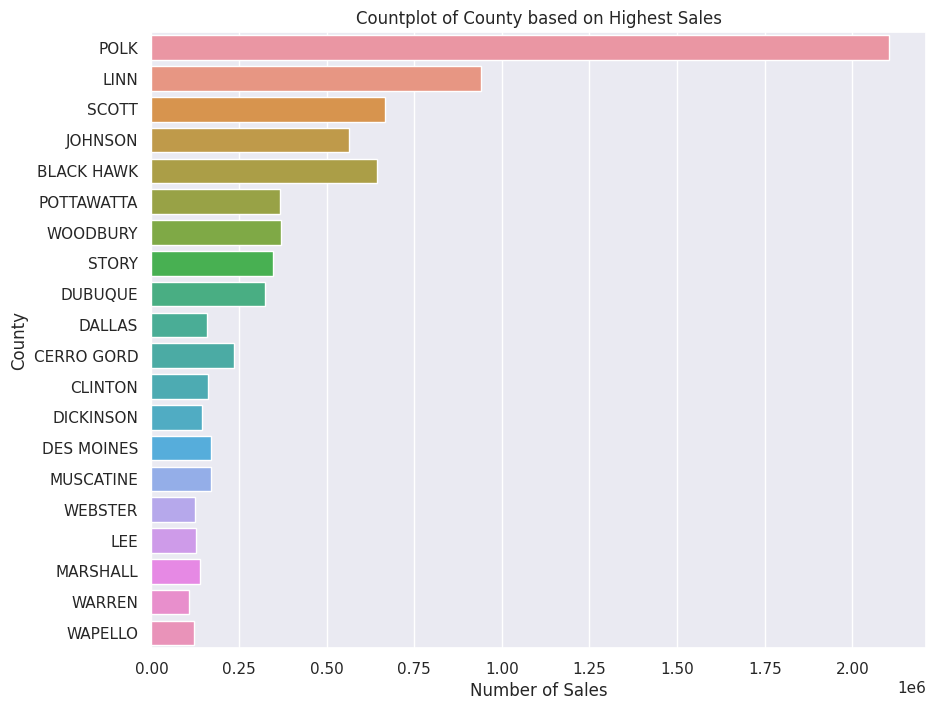

In [127]:
# Check the frequency distribution of categorical variables in the dataset
county_sales = df.groupby('county')['sale_dollars'].sum().reset_index()
county_sales = county_sales.sort_values('sale_dollars', ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(y="county", data=df, order=county_sales['county'])
ax.set(xlabel='Number of Sales', ylabel='County', title='Countplot of County based on Highest Sales')
plt.show()

From the above graph, we can see that the highest Liquor selling County is **POLK** with more than **\$2 Million** USD of sales followed by **LINN** at around **\$950,000** USD.

### Day Wise Trends of Sales

In [129]:
df_plot = df.fillna('NA').groupby(['day_name','date'])['sale_dollars'].sum().groupby(
            ['day_name']).max().sort_values().groupby(
            ['day_name']).sum().sort_values(ascending=False)
top_count1 = pd.DataFrame(df_plot)
top_count1 = pd.DataFrame(df_plot.head(50))

fig_reg = px.bar(top_count1,x=top_count1.index, y='sale_dollars',color='sale_dollars')
fig_reg.update_layout(
    title="Sales of liquor Every Day",
    xaxis_title=" Days Of The Week",
    yaxis_title="Sales in dollars")

From the above graph, we can see that most of the liquor is sold on Tuesdays.

## Q - Q 

### Sales by Bottles Sold

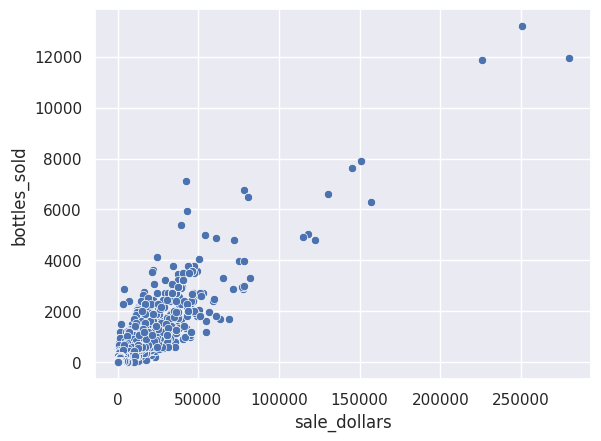

In [130]:
# Check the correlation between numerical variables in the dataset
sns.scatterplot(x='sale_dollars', y='bottles_sold', data=df)
plt.show()

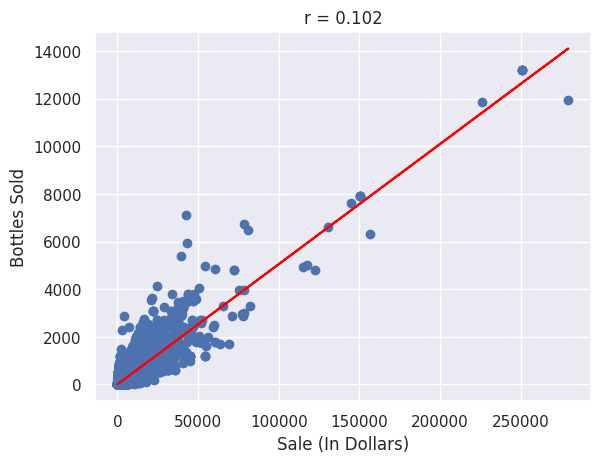

In [131]:
r = np.corrcoef(df['state_bottle_retail'], df['sale_dollars'])[0][1]
# scatter plot for two quantitative variables
plt.scatter(df['sale_dollars'], df['bottles_sold'])
plt.xlabel('Sale (In Dollars)')
plt.ylabel('Bottles Sold')
plt.title(f'r = {round(r, 4)}')

# calculate the coefficients of the regression line
m, b = np.polyfit(df['sale_dollars'], df['bottles_sold'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['sale_dollars'], regression_line(df['sale_dollars']), color='red')

# display the plot
plt.show()

From the above graph, we can see a strong and positive relation between sales and number of bottles sold.

### Sales by Bottle Volume In Liters

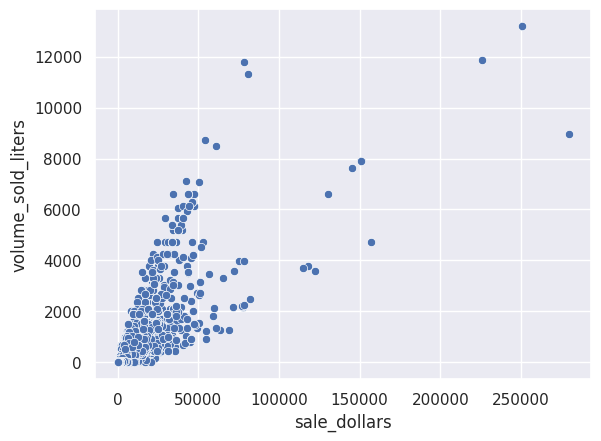

In [132]:
# Check the correlation between numerical variables in the dataset
sns.scatterplot(x='sale_dollars', y='volume_sold_liters', data=df)
plt.show()

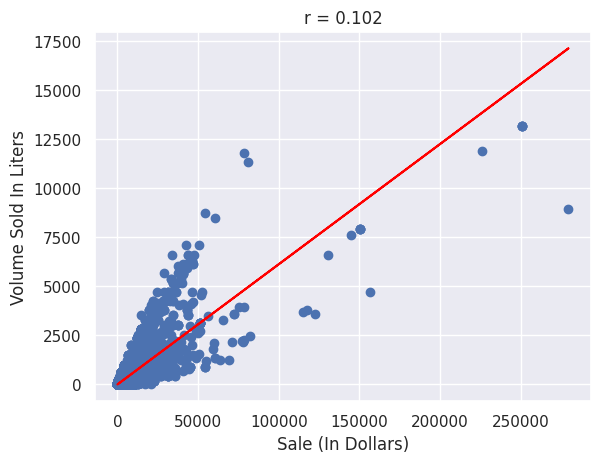

In [133]:
r = np.corrcoef(df['state_bottle_retail'], df['sale_dollars'])[0][1]
# scatter plot for two quantitative variables
plt.scatter(df['sale_dollars'], df['volume_sold_liters'])
plt.xlabel('Sale (In Dollars)')
plt.ylabel('Volume Sold In Liters')
plt.title(f'r = {round(r, 4)}')

# calculate the coefficients of the regression line
m, b = np.polyfit(df['sale_dollars'], df['volume_sold_liters'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['sale_dollars'], regression_line(df['sale_dollars']), color='red')

# display the plot
plt.show()

From the above graph, we can see a strong and positive relation between sales and volume sold in liters.

### Sales By State Retail Price

Text(0.5, 1.0, 'r = 0.102')

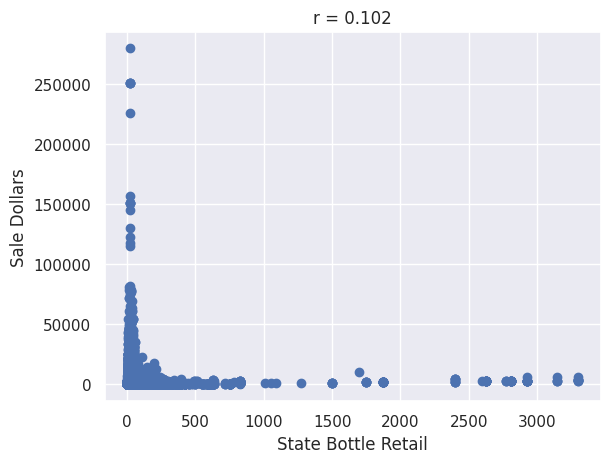

In [134]:
# calculate linear correlation between two quantitative variables

corr_mat = np.corrcoef(df['state_bottle_retail'], df['sale_dollars'])
r = corr_mat[0][1]

# scatter plot for two quantitative variables
plt.scatter(df['state_bottle_retail'], df['sale_dollars'])
plt.xlabel('State Bottle Retail')
plt.ylabel('Sale Dollars')
plt.title(f'r = {round(r, 4)}')

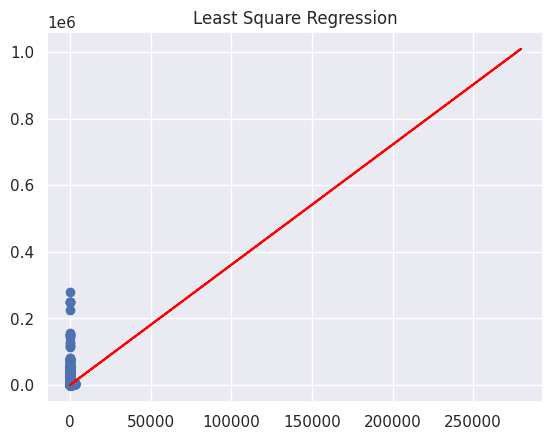

In [135]:
# Calculate linear correlation between two quantitative variables
corr_mat = np.corrcoef(df['state_bottle_retail'], df['sale_dollars'])
r = corr_mat[0][1]

# plot scatter
plt.scatter(df['state_bottle_retail'], df['sale_dollars'])

# calculate the coefficients of the regression line
m, b = np.polyfit(df['state_bottle_retail'], df['sale_dollars'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['sale_dollars'], regression_line(df['sale_dollars']), color='red',label=f'sale_dollars={round(m,3)} + {round(b,3)}*state_bottle_retail')

plt.title('Least Square Regression')
plt.show()


From the above graph, we can observe a weak relation between state bottle retail and sales.

### Sales By Volume (In Gallons)

Text(0.5, 1.0, 'r = 0.8409')

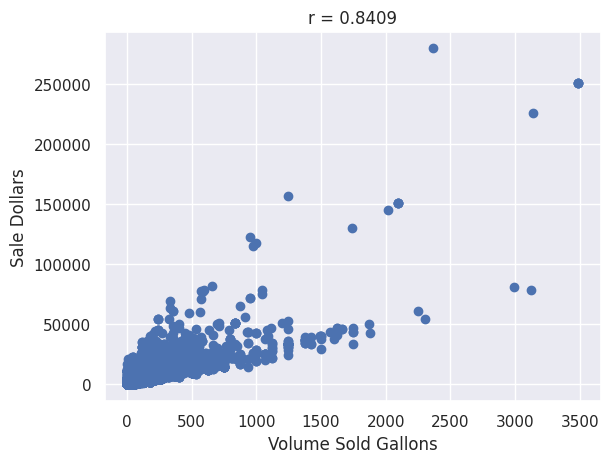

In [136]:
# calculate linear correlation between two quantitative variables

corr_mat = np.corrcoef(df['volume_sold_gallons'], df['sale_dollars'])
r = corr_mat[0][1]

# scatter plot for two quantitative variables
plt.scatter(df['volume_sold_gallons'], df['sale_dollars'])
plt.xlabel('Volume Sold Gallons')
plt.ylabel('Sale Dollars')
plt.title(f'r = {round(r, 4)}')

Text(0.5, 1.0, 'Least Square Regression')

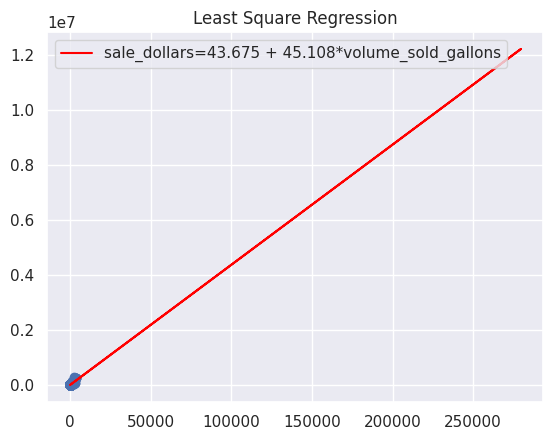

In [138]:
# scatter plot with least square regression line

# correlation
r=np.corrcoef(df['volume_sold_gallons'], df['sale_dollars'])[0][1]

# plot scatter
plt.scatter(df['volume_sold_gallons'], df['sale_dollars'])

# calculate the coefficients of the regression line
m, b = np.polyfit(df['volume_sold_gallons'], df['sale_dollars'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['sale_dollars'], regression_line(df['sale_dollars']), color='red',label=f'sale_dollars={round(m,3)} + {round(b,3)}*volume_sold_gallons')

plt.legend(loc='upper left')
plt.title('Least Square Regression')



From the above graph, we can see a strong and positive relation between sales and volume sold in gallons.

### Bottles Sold By Volume (In Liters)

Text(0.5, 1.0, 'r = 0.8577')

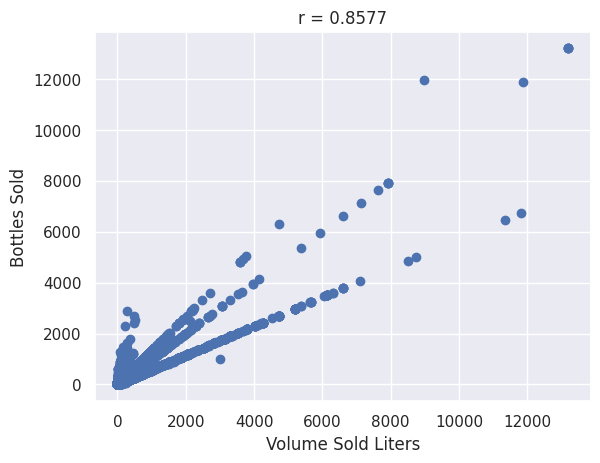

In [139]:
# calculate linear correlation between two quantitative variables

corr_mat = np.corrcoef(df['volume_sold_liters'], df['bottles_sold'])
r = corr_mat[0][1]

# scatter plot for two quantitative variables
plt.scatter(df['volume_sold_liters'], df['bottles_sold'])
plt.xlabel('Volume Sold Liters')
plt.ylabel('Bottles Sold')
plt.title(f'r = {round(r, 4)}')

Text(0.5, 1.0, 'Least Square Regression')

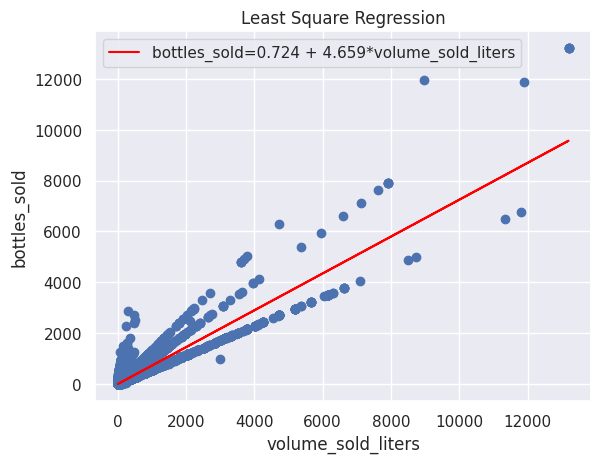

In [140]:
# scatter plot with least square regression line

# correlation
r=np.corrcoef(df['volume_sold_liters'], df['bottles_sold'])[0][1]

# scatter plot for two quantitative variables
plt.scatter(df['volume_sold_liters'], df['bottles_sold'])
plt.xlabel('volume_sold_liters')
plt.ylabel('bottles_sold')


# calculate the coefficients of the regression line
m, b = np.polyfit(df['volume_sold_liters'], df['bottles_sold'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['bottles_sold'], regression_line(df['bottles_sold']), color='red',label=f'bottles_sold={round(m,3)} + {round(b,3)}*volume_sold_liters')

plt.legend(loc='upper left')
plt.title('Least Square Regression')



From the above graph, we can see a strong and positive relation between sales and volume sold in gallons.

### Bottles Sold By Volume (In Gallons)

Text(0.5, 1.0, 'r = 0.8577')

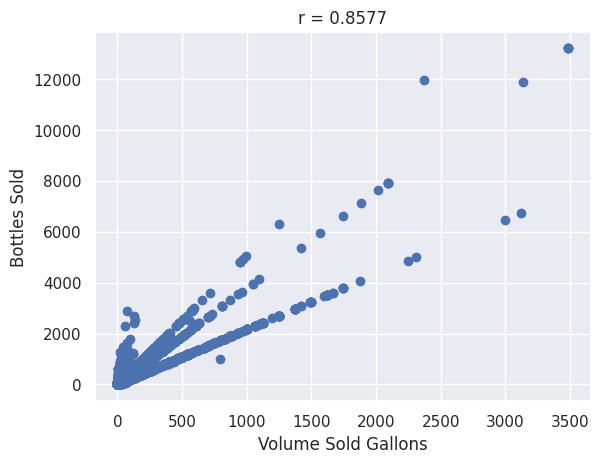

In [141]:
# calculate linear correlation between two quantitative variables

corr_mat = np.corrcoef(df['volume_sold_gallons'], df['bottles_sold'])
r = corr_mat[0][1]

# scatter plot for two quantitative variables
plt.scatter(df['volume_sold_gallons'], df['bottles_sold'])
plt.xlabel('Volume Sold Gallons')
plt.ylabel('Bottles Sold')
plt.title(f'r = {round(r, 4)}')

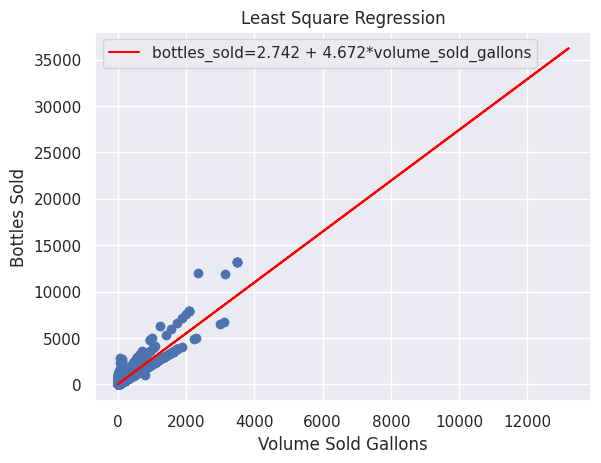

In [142]:
# scatter plot with least square regression line

# correlation
r=np.corrcoef(df['volume_sold_gallons'], df['bottles_sold'])[0][1]

# scatter plot for two quantitative variables
plt.scatter(df['volume_sold_gallons'], df['bottles_sold'])
plt.xlabel('Volume Sold Gallons')
plt.ylabel('Bottles Sold')


# calculate the coefficients of the regression line
m, b = np.polyfit(df['volume_sold_gallons'], df['bottles_sold'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['bottles_sold'], regression_line(df['bottles_sold']), color='red',label=f'bottles_sold={round(m,3)} + {round(b,3)}*volume_sold_gallons')
plt.legend(loc='upper left')
plt.title('Least Square Regression')
plt.show()

### Profit By Sales

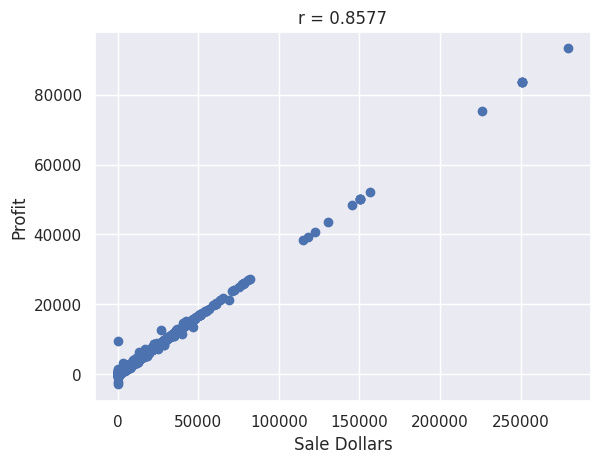

In [143]:
# Create a scatterplot of profit vs. sale_dollars
plt.scatter(df['sale_dollars'],df['profit'])

# Set the title and axis labels
plt.title('Profit vs. Sale Dollars')
plt.xlabel('Sale Dollars')
plt.ylabel('Profit')
plt.title(f'r = {round(r, 4)}')

# Show the plot
plt.show()

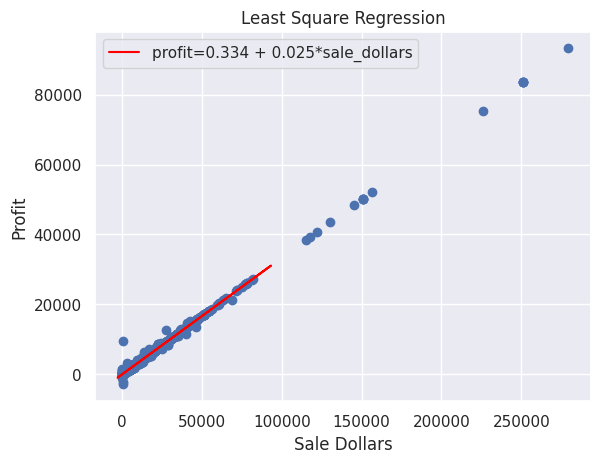

In [144]:
r=np.corrcoef(df['sale_dollars'], df['profit'])[0][1]
# Create a scatterplot of profit vs. sale_dollars
plt.scatter(df['sale_dollars'],df['profit'])

# Set the title and axis labels
plt.title('Profit vs. Sale Dollars')
plt.xlabel('Sale Dollars')
plt.ylabel('Profit')

# calculate the coefficients of the regression line
m, b = np.polyfit(df['sale_dollars'], df['profit'], 1)

# create a function for the regression line equation
regression_line = np.poly1d((m, b))

# plot the regression line
plt.plot(df['profit'], regression_line(df['profit']), color='red',label=f'profit={round(m,3)} + {round(b,3)}*sale_dollars')
plt.legend(loc='upper left')
plt.title('Least Square Regression')

# display the plot
plt.show()

We can observe from the above graph that the relationship between Sales and Profit is a very strong and positive linear relation.

### Profit By State Bottle Cost

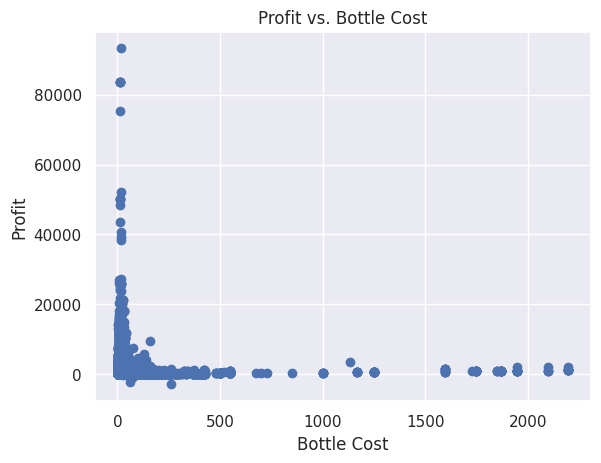

In [145]:
r=np.corrcoef(df['state_bottle_cost'], df['profit'])[0][1]
# Create a scatterplot of profit vs. state bottle cost
plt.scatter(df['state_bottle_cost'],df['profit'])

# Set the title and axis labels
plt.title('Profit vs. Bottle Cost')
plt.xlabel('Bottle Cost')
plt.ylabel('Profit')

# display the plot
plt.show()

# Hypothesis 1: Any difference on sales between rural areas and urban areas.

**Null Hypothesis**:- There is a difference on sales between rural and urban areas.

**Alternate Hypothesis**:- There is no difference on sales between rural and urban areas.

In [23]:
import pandas as pd
from scipy.stats import norm

# Split the dataset into urban and rural groups
urban_sales = df.loc[df["city"].isin(["DES MOINES", "CEDAR RAPIDS", "DAVENPORT", "SIOUX CITY", "WATERLOO"])]
rural_sales = df.loc[~df["city"].isin(["DES MOINES", "CEDAR RAPIDS", "DAVENPORT", "SIOUX CITY", "WATERLOO"])]

# Calculate the mean liquor sales for each group
urban_mean = urban_sales["sale_dollars"].mean()
rural_mean = rural_sales["sale_dollars"].mean()

# Calculate the standard error of the difference between means
urban_std = urban_sales["sale_dollars"].std()
rural_std = rural_sales["sale_dollars"].std()
n1 = len(urban_sales)
n2 = len(rural_sales)
se_diff = ((urban_std ** 2) / n1 + (rural_std ** 2) / n2) ** 0.5

# Calculate the z-score
hypothesized_diff = 0 # null hypothesis assumes no difference between means
z_score = (urban_mean - rural_mean - hypothesized_diff) / se_diff
print('Z Score:',z_score)

# Calculate the p-value
p_value = norm.sf(abs(z_score)) * 2 # two-tailed test
print('P value:',p_value)

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis. There is a significant difference in liquor sales between urban and rural areas.")
else:
    print("Fail to reject null hypothesis. There is no significant difference in liquor sales between urban and rural areas.")


Z Score: 94.76359708537522
P value: 0.0
Reject null hypothesis. There is a significant difference in liquor sales between urban and rural areas.


Since the p-value is much lower than the significance value of $α=0.05$, we can reject the claim made by the recent study about there is a difference on sales between rural and urban areas.

# Hypothesis 2: - A recent study claims that there is a correlation between Liquor sales and cost to the store.

**Null Hypothesis**:- There is no difference in sales of liquor between items with higher and lower cost to the store.

**Alternate Hypothesis**:- There is a difference in sales of liquor between items with higher and lower cost to the store.

In [25]:
# Calculate profit for each item
df['profit'] = (df['state_bottle_retail'] - df['state_bottle_cost']) * df['bottles_sold']

# Calculate the mean profit for items with cost to store above and below the median
high_cost_mean_profit = df.loc[df['state_bottle_cost'] > df['state_bottle_cost'].median(), 'profit'].mean()
low_cost_mean_profit = df.loc[df['state_bottle_cost'] <= df['state_bottle_cost'].median(), 'profit'].mean()

# Calculate the standard error of the mean difference
high_cost_n = len(df.loc[df['state_bottle_cost'] > df['state_bottle_cost'].median(), 'profit'])
low_cost_n = len(df.loc[df['state_bottle_cost'] <= df['state_bottle_cost'].median(), 'profit'])
high_cost_se = np.sqrt(np.var(df.loc[df['state_bottle_cost'] > df['state_bottle_cost'].median(), 'profit']) / high_cost_n)
low_cost_se = np.sqrt(np.var(df.loc[df['state_bottle_cost'] <= df['state_bottle_cost'].median(), 'profit']) / low_cost_n)
se_diff = np.sqrt((high_cost_se ** 2) + (low_cost_se ** 2))

# Calculate the z-score
z_score = (high_cost_mean_profit - low_cost_mean_profit) / se_diff
print('Z Score:',z_score)

# Calculate the p-value
p_value = stats.norm.sf(abs(z_score)) * 2
print('P value:',p_value)

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("There is a significant difference in sales of liquor between items with higher and lower cost to the store.")
else:
    print("There is no significant difference in sales of liquor between items with higher and lower cost to the store.")


Z Score: 400.8247166061349
P value: 0.0
There is a significant difference in sales of liquor between items with higher and lower cost to the store.


Since the p-value is much lower than the significance value of $α=0.05$, we can reject the claim made by the recent study about there is no difference in sales of liquor between items with higher and lower cost to the store.